# NFL Player Statistics Exploration

## Libraries

In [108]:
# - What am I doing? -
# Loading in libraries

# Load in data exploration libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use for filtering data by date
from datetime import datetime, timedelta

## Data loading and cleaning

In [109]:
# - What am I doing? -
# Read in NFL Player Statistics data

# Pull Week to week gamelogs for top QBs, RBs, and WR
QuarterbackWeektoWeek2023 = pd.read_csv(r'/Users/jacoblender/Desktop/Football dash/Data/PasserGamelog_RAW.csv')
RunningbackWeektoWeek2023 = pd.read_csv(r'/Users/jacoblender/Desktop/Football dash/Data/RunningbackGamelog_RAW.csv')
ReceiverWeektoWeek2023 = pd.read_csv(r'/Users/jacoblender/Desktop/Football dash/Data/ReceiverGamelog_RAW.csv')

# Create list of dataframes to iterate through.
files = [QuarterbackWeektoWeek2023, RunningbackWeektoWeek2023, ReceiverWeektoWeek2023]

# Removed unnamed index column
for i in range(len(files)):
    files[i].drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')

In [110]:
# - What am I doing? -
# PASS_YDS column is being cast as an object type. This is because the commas in integer are messing 
# / with the data type.
# # Remove the commas from the column and then change datatype to int64.
# PassingLeaders2023['PASS_YDS'] = PassingLeaders2023['PASS_YDS'].str.replace(r',', '')
# PassingLeaders2023['PASS_YDS'] = PassingLeaders2023['PASS_YDS'].astype(int)

# # RUSH_YDS column is being cast as an object type. This is because the commas in integer are messing with the data type.
# # Remove the commas from the column and then change datatype to int64.
# RushingLeaders2023['RUSH_YDS'] = RushingLeaders2023['RUSH_YDS'].str.replace(r',', '')
# RushingLeaders2023['RUSH_YDS'] = RushingLeaders2023['RUSH_YDS'].astype(int)

# # REC_YDS column is being cast as an object type. This is because the commas in integer are messing with the data type.
# # Remove the commas from the column and then change datatype to int64.
# ReceivingLeaders2023['REC_YDS'] = ReceivingLeaders2023['REC_YDS'].str.replace(r',', '')
# ReceivingLeaders2023['REC_YDS'] = ReceivingLeaders2023['REC_YDS'].astype(int)

# QBR column is being cast as an object type. This is because the commas in integer are messing with 
# / the data type.
# Remove the commas from the column and then change datatype to int64.
#QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'.', '')
#QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'-', '')
#QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'', '')

# 2. Convert QBR dtype from object to numeric.
#QuarterbackWeektoWeek2023['QBR'] = pd.to_numeric(QuarterbackWeektoWeek2023['QBR'], errors='coerce')

In [111]:
# - What am I doing? -
# Drop duplicate rows. We do this because a person can be a leader in Rushing and Receiving. When we put that player from 
# Rushing and Receiver leaderboard in their positional dataframe. There results are then doubled up.

QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop_duplicates()
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop_duplicates()
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop_duplicates()

In [112]:
# - What am I doing? -
# I want to look at QBs that have had their reps in regular season game. To be in this dataframe, a player must have taken a 100 snaps.

# Group by 'Player' and sum completions
grouped_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.groupby('playerName')['ATT'].sum().reset_index()

# Filter players with total completions greater than or equal to 100
filtered_players = grouped_QuarterbackWeektoWeek2023.loc[grouped_QuarterbackWeektoWeek2023['ATT'] >= 50, 'playerName']

# Keep only rows in the original DataFrame for the filtered players
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023[QuarterbackWeektoWeek2023['playerName'].isin(filtered_players)]

In [113]:
# - What am I doing? -
# I want to look at RBs that have had their reps in regular season game. 
# To be in this dataframe, a player must have taken a 100 snaps.

# Group by 'Player' and sum completions
grouped_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.groupby('playerName')['CAR'].sum().reset_index()

# Filter players with total completions greater than or equal to 100
filtered_players = grouped_RunningbackWeektoWeek2023.loc[grouped_RunningbackWeektoWeek2023['CAR'] >= 50, 'playerName']

# Keep only rows in the original DataFrame for the filtered players
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023[RunningbackWeektoWeek2023['playerName'].isin(filtered_players)]

In [114]:
# - What am I doing? -
# I want to look at Receivers that have had their reps in regular season game. 
# To be in this dataframe, a player must have taken a 100 snaps.

# Group by 'Player' and sum completions
grouped_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.groupby('playerName')['TGTS'].sum().reset_index()

# Filter players with total completions greater than or equal to 100
filtered_players = grouped_ReceiverWeektoWeek2023.loc[grouped_ReceiverWeektoWeek2023['TGTS'] >= 50, 'playerName']

# Keep only rows in the original DataFrame for the filtered players
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023[ReceiverWeektoWeek2023['playerName'].isin(filtered_players)]

In [115]:
# - What am I doing? -
# Get high level information about NFL Player Statistics.

QuarterbackWeektoWeek2023.info()
RunningbackWeektoWeek2023.info()
ReceiverWeektoWeek2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 381
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        372 non-null    object 
 1   Opponent    372 non-null    object 
 2   Result      372 non-null    object 
 3   CMP         372 non-null    int64  
 4   ATT         372 non-null    int64  
 5   PASS_YDS    372 non-null    int64  
 6   CMP%        372 non-null    float64
 7   PASS_AVG    372 non-null    float64
 8   PASS_TD     372 non-null    int64  
 9   INT         372 non-null    int64  
 10  PASS_LNG    372 non-null    int64  
 11  SACK        372 non-null    int64  
 12  RTG         372 non-null    float64
 13  QBR         372 non-null    object 
 14  RUSH_CAR    372 non-null    int64  
 15  RUSH_YDS    372 non-null    int64  
 16  RUSH_AVG    372 non-null    float64
 17  RUSH_TD     372 non-null    int64  
 18  LNG_RUSH    372 non-null    int64  
 19  playerName  372 non-null    object

In [116]:
# - What am I doing? -
# For [Date] column in Quarterback gamelog dataframe, need to remove day of the week and add year to the date.

# 1. Split [Date] column by a ' ' (space) into [Day of the week] and [MonthYear] columns.
QuarterbackWeektoWeek2023[['Day of the week', 'MonthYear']] = QuarterbackWeektoWeek2023['Date'].str.split(' ', expand=True)

# 2. Split [MonthYear] column by a '/' into [Month] and [Day] columns.
QuarterbackWeektoWeek2023[['Month', 'Day']] = QuarterbackWeektoWeek2023['MonthYear'].str.split('/', expand=True)

# 3. Convert [Month] column from an object to an int.
QuarterbackWeektoWeek2023['Month'] = QuarterbackWeektoWeek2023['Month'].astype(int)

# 4. If game happened after June it was 2023 otherwise it is 2024. The football season runs from August to February. 
# The logic above utilizes that to determine a year when the game took place. This will need to be changed for next season. 
QuarterbackWeektoWeek2023.loc[QuarterbackWeektoWeek2023['Month'] > 6, 'Date'] = QuarterbackWeektoWeek2023['MonthYear'] + '/23'
QuarterbackWeektoWeek2023.loc[QuarterbackWeektoWeek2023['Month'] < 6, 'Date'] = QuarterbackWeektoWeek2023['MonthYear'] + '/24'

# 5. Drop [Day of the week], [Month], [Day], [MonthYear] columns.
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Day of the week', 'Month', 'Day', 'MonthYear'])

# 6. Change Date to a datetime datetype
QuarterbackWeektoWeek2023['Date'] = pd.to_datetime(QuarterbackWeektoWeek2023['Date'].str.strip(), format='%m/%d/%y').dt.date

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [117]:
# - What am I doing? -
# For [Date] column in Runningback gamelog dataframe, need to remove day of the week and add year to the date.

# 1. Split [Date] column by a ' ' (space) into [Day of the week] and [MonthYear] columns.
RunningbackWeektoWeek2023[['Day of the week', 'MonthYear']] = RunningbackWeektoWeek2023['Date'].str.split(' ', expand=True)

# 2. Split [MonthYear] column by a '/' into [Month] and [Day] columns.
RunningbackWeektoWeek2023[['Month', 'Day']] = RunningbackWeektoWeek2023['MonthYear'].str.split('/', expand=True)

# 3. Convert [Month] column from an object to an int.
RunningbackWeektoWeek2023['Month'] = RunningbackWeektoWeek2023['Month'].astype(int)

# 4. If game happened after June it was 2023 otherwise it is 2024. The football season runs from August to February. 
# The logic above utilizes that to determine a year when the game took place. This will need to be changed for next season. 
RunningbackWeektoWeek2023.loc[RunningbackWeektoWeek2023['Month'] > 6, 'Date'] = RunningbackWeektoWeek2023['MonthYear'] + '/23'
RunningbackWeektoWeek2023.loc[RunningbackWeektoWeek2023['Month'] < 6, 'Date'] = RunningbackWeektoWeek2023['MonthYear'] + '/24'

# 5. Drop [Day of the week], [Month], [Day], [MonthYear] columns.
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Day of the week', 'Month', 'Day', 'MonthYear'])

# 6. Change Date to a datetime datetype
RunningbackWeektoWeek2023['Date'] = pd.to_datetime(RunningbackWeektoWeek2023['Date'].str.strip(), format='%m/%d/%y').dt.date

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [118]:
# - What am I doing? -
# For [Date] column in Receiver gamelog dataframe, need to remove day of the week and add year to the date.

# 1. Split [Date] column by a ' ' (space) into [Day of the week] and [MonthYear] columns.
ReceiverWeektoWeek2023[['Day of the week', 'MonthYear']] = ReceiverWeektoWeek2023['Date'].str.split(' ', expand=True)

# 2. Split [MonthYear] column by a '/' into [Month] and [Day] columns.
ReceiverWeektoWeek2023[['Month', 'Day']] = ReceiverWeektoWeek2023['MonthYear'].str.split('/', expand=True)

# 3. Convert [Month] column from an object to an int.
ReceiverWeektoWeek2023['Month'] = ReceiverWeektoWeek2023['Month'].astype(int)

# 4. If game happened after June it was 2023 otherwise it is 2024. The football season runs from August to February. 
# The logic above utilizes that to determine a year when the game took place. This will need to be changed for next season. 
ReceiverWeektoWeek2023.loc[ReceiverWeektoWeek2023['Month'] > 6, 'Date'] = ReceiverWeektoWeek2023['MonthYear'] + '/23'
ReceiverWeektoWeek2023.loc[ReceiverWeektoWeek2023['Month'] < 6, 'Date'] = ReceiverWeektoWeek2023['MonthYear'] + '/24'

# 5. Drop [Day of the week], [Month], [Day], [MonthYear] columns.
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Day of the week', 'Month', 'Day', 'MonthYear'])

# 6. Change Date to a datetime datetype
ReceiverWeektoWeek2023['Date'] = pd.to_datetime(ReceiverWeektoWeek2023['Date'].str.strip(), format='%m/%d/%y').dt.date

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [119]:
# - What am I doing? -
# Splitting [result] column into a winner score, loser score, and OT column in Quarterback gamelog dataframe

# 1. Split [Score] column into score and result of game (W/L).
QuarterbackWeektoWeek2023['Score'] = QuarterbackWeektoWeek2023['Result'].str[1:]
QuarterbackWeektoWeek2023['Game Result'] = QuarterbackWeektoWeek2023['Result'].str[:1]

# 2. Split [Score] column by a '-' into [Winner Score] and [Loser Score] columns.
QuarterbackWeektoWeek2023[['Winner Score', 'Loser Score']] = QuarterbackWeektoWeek2023['Score'].str.split('-', expand=True)

# 3. Convert [Winner Score] column from an object to an int.
QuarterbackWeektoWeek2023['Winner Score'] = QuarterbackWeektoWeek2023['Winner Score'].astype(int)

# 4. Split [Loser Score] column by a ' ' (space) into [Loser Score] and [OT?] columns.
QuarterbackWeektoWeek2023[['Loser Score', 'OT?']] = QuarterbackWeektoWeek2023['Loser Score'].str.split(' ', expand=True)

# 5. Convert [Loser Score] column from an object to an int.
QuarterbackWeektoWeek2023['Loser Score'] = QuarterbackWeektoWeek2023['Loser Score'].astype(int)

# 6. Drop [Score] and [Result] columns.
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Score', 'Result'])

# Print success if data is split and columns are removed.
print("Success!")

Success!


In [120]:
# - What am I doing? -
# Splitting [result] column into a winner score, loser score, and OT column in Runningback gamelog dataframe

# 1. Split [Score] column into score and result of game (W/L).
RunningbackWeektoWeek2023['Score'] = RunningbackWeektoWeek2023['Result'].str[1:]
RunningbackWeektoWeek2023['Game Result'] = RunningbackWeektoWeek2023['Result'].str[:1]

# 2. Split [Score] column by a '-' into [Winner Score] and [Loser Score] columns.
RunningbackWeektoWeek2023[['Winner Score', 'Loser Score']] = RunningbackWeektoWeek2023['Score'].str.split('-', expand=True)

# 3. Convert [Winner Score] column from an object to an int.
RunningbackWeektoWeek2023['Winner Score'] = RunningbackWeektoWeek2023['Winner Score'].astype(int)

# 4. Split [Loser Score] column by a ' ' (space) into [Loser Score] and [OT?] columns.
RunningbackWeektoWeek2023[['Loser Score', 'OT?']] = RunningbackWeektoWeek2023['Loser Score'].str.split(' ', expand=True)

# 5. Convert [Loser Score] column from an object to an int.
RunningbackWeektoWeek2023['Loser Score'] = RunningbackWeektoWeek2023['Loser Score'].astype(int)

# 6. Drop [Score] and [Result] columns.
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Score', 'Result'])

# Print success if data is split and columns are removed.
print("Success!")

Success!


In [121]:
# - What am I doing? -
# Splitting [result] column into a winner score, loser score, and OT column in Receiver gamelog dataframe

# 1. Split [Score] column into score and result of game (W/L).
ReceiverWeektoWeek2023['Score'] = ReceiverWeektoWeek2023['Result'].str[1:]
ReceiverWeektoWeek2023['Game Result'] = ReceiverWeektoWeek2023['Result'].str[:1]

# 2. Split [Score] column by a '-' into [Winner Score] and [Loser Score] columns.
ReceiverWeektoWeek2023[['Winner Score', 'Loser Score']] = ReceiverWeektoWeek2023['Score'].str.split('-', expand=True)

# 3. Convert [Winner Score] column from an object to an int.
ReceiverWeektoWeek2023['Winner Score'] = ReceiverWeektoWeek2023['Winner Score'].astype(int)

# 4. Split [Loser Score] column by a ' ' (space) into [Loser Score] and [OT?] columns.
ReceiverWeektoWeek2023[['Loser Score', 'OT?']] = ReceiverWeektoWeek2023['Loser Score'].str.split(' ', expand=True)

# 5. Convert [Loser Score] column from an object to an int.
ReceiverWeektoWeek2023['Loser Score'] = ReceiverWeektoWeek2023['Loser Score'].astype(int)

# 6. Drop [Score] and [Result] columns.
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Score', 'Result'])

# Print success if data is split and columns are removed.
print("Success!")

Success!


In [122]:
# - What am I doing? -
# Looking at [Opponent] column in Quarterback gamelog dataframe to determine if it was a Home/Away game.

# 1. Create function to determine 'Away' (@) or else 'Home'
def home_away_indicator(indicator):
    return 'Away' if '@' in indicator else 'Home'

# 2. Create function to remove 'vs' and '@' from [Opponent] column.
def remove_special_characters(text):
    return text.replace('@', '').replace('vs', '')

# 3. Apply the home_away_indicator() function to [Opponent] column to create a [Home/Away] column.
QuarterbackWeektoWeek2023['Home/Away'] = QuarterbackWeektoWeek2023['Opponent'].apply(lambda x: home_away_indicator(x))

# 4. Apply the remove_special_characters() function to [Opponent] to remove special characters from [Opponent].
QuarterbackWeektoWeek2023['Opponent'] = QuarterbackWeektoWeek2023['Opponent'].apply(lambda x: remove_special_characters(x))

# Print success if column is split and characters are removed.
print("Success!")

Success!


In [123]:
# - What am I doing? -
# Looking at [Opponent] column in Runningback gamelog dataframe to determine if it was a Home/Away game.

# 1. Create function to determine 'Away' (@) or else 'Home'
def home_away_indicator(indicator):
    return 'Away' if '@' in indicator else 'Home'

# 2. Create function to remove 'vs' and '@' from [Opponent] column.
def remove_special_characters(text):
    return text.replace('@', '').replace('vs', '')

# 3. Apply the home_away_indicator() function to [Opponent] column to create a [Home/Away] column.
RunningbackWeektoWeek2023['Home/Away'] = RunningbackWeektoWeek2023['Opponent'].apply(lambda x: home_away_indicator(x))

# 4. Apply the remove_special_characters() function to [Opponent] to remove special characters from [Opponent].
RunningbackWeektoWeek2023['Opponent'] = RunningbackWeektoWeek2023['Opponent'].apply(lambda x: remove_special_characters(x))

# Print success if column is split and characters are removed.
print("Success!")

Success!


In [124]:
# - What am I doing? -
# Looking at [Opponent] column in Receiver gamelog dataframe to determine if it was a Home/Away game.

# 1. Create function to determine 'Away' (@) or else 'Home'
def home_away_indicator(indicator):
    return 'Away' if '@' in indicator else 'Home'

# 2. Create function to remove 'vs' and '@' from [Opponent] column.
def remove_special_characters(text):
    return text.replace('@', '').replace('vs', '')

# 3. Apply the home_away_indicator() function to [Opponent] column to create a [Home/Away] column.
ReceiverWeektoWeek2023['Home/Away'] = ReceiverWeektoWeek2023['Opponent'].apply(lambda x: home_away_indicator(x))

# 4. Apply the remove_special_characters() function to [Opponent] to remove special characters from [Opponent].
ReceiverWeektoWeek2023['Opponent'] = ReceiverWeektoWeek2023['Opponent'].apply(lambda x: remove_special_characters(x))

# Print success if column is split and characters are removed.
print("Success!")

Success!


In [125]:
# - What am I doing? -
# Converting percentage to a decimal for calculation reasons.

# Don't put cap on number of columns shown.
pd.options.display.max_columns = None

# 1. Divide integer by 100 to convert percentage to decimal.
QuarterbackWeektoWeek2023['CMP%'] = QuarterbackWeektoWeek2023['CMP%'] / 100

# Print success if percentage is converted to decimal.
print("Success!")

Success!


In [126]:
# - What am I doing? -
# Look at columns with specific data types (float64(5), int64(13), object(6)).

# Tables: QuarterbackWeektoWeek2023, RunningbackWeektoWeek2023, ReceiverWeektoWeek2023

# Select columns only with specific data types.
RunningbackWeektoWeek2023.select_dtypes(include='float')

,RUSH_AVG,REC_AVG
0,8.1,0.0
1,4.6,11.0
2,2.0,17.0
3,4.2,0.0
4,2.2,-4.0
...,...,...
633,3.0,1.5
634,1.3,0.0
635,2.1,6.0
636,8.0,7.0


In [127]:
# - What am I doing? -
# Switch dates to datetime format
QuarterbackWeektoWeek2023['Date'] = pd.to_datetime(QuarterbackWeektoWeek2023['Date'])
RunningbackWeektoWeek2023['Date'] = pd.to_datetime(RunningbackWeektoWeek2023['Date'])
ReceiverWeektoWeek2023['Date'] = pd.to_datetime(ReceiverWeektoWeek2023['Date'])


In [128]:
# - What am I doing? -
# Add a column that calculates the points of the players according to Sleeper Scoring

# What do you get points for?

scoring = {
# Passing
'PASS_YDS' : 0.04,
'PASS_TD' : 4,
'INT' : -1,
    
# Rushing
'RUSH_YDS' : 0.1,
'RUSH_TD' : 6
}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
QuarterbackWeektoWeek2023['fantasy_points'] = QuarterbackWeektoWeek2023.apply(calculate_fantasy_points, axis=1)

In [129]:
# - What am I doing? -
# Add a column that calculates the points of the players according to Sleeper Scoring

# What do you get points for?

scoring = {
# Rushing
'RUSH_YDS' : 0.1,
'RUSH_TD' : 6,
'LST' : -2,

# Receiving
'REC':0.5,
'REC_YDS':0.1,
'REC_TD':6

}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
RunningbackWeektoWeek2023['fantasy_points'] = RunningbackWeektoWeek2023.apply(calculate_fantasy_points, axis=1)

In [130]:
# - What am I doing? -
# Add a column that calculates the points of the players according to Sleeper Scoring

# What do you get points for?

scoring = {
# Rushing
'RUSH_YDS' : 0.1,
'RUSH_TD' : 6,
'LST': -2,

# Receiving
'REC':0.5,
'REC_YDS':0.1,
'REC_TD':6

}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
ReceiverWeektoWeek2023['fantasy_points'] = ReceiverWeektoWeek2023.apply(calculate_fantasy_points, axis=1)

In [131]:
# - What am I doing? -
# Add Reception % to Runningback and Wide Receiver

RunningbackWeektoWeek2023['REC%'] = RunningbackWeektoWeek2023['REC'] / RunningbackWeektoWeek2023['TGTS']
ReceiverWeektoWeek2023['REC%'] = ReceiverWeektoWeek2023['REC'] / ReceiverWeektoWeek2023['TGTS']

## Basic Stats

In [132]:
# - What am I doing? -
# Get common statistics to learn more about quarterbacks week to week.
describe_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date'])

# Get common statistics to learn more about quarterbacks week to week.
describe_QuarterbackWeektoWeek2023.describe()

,CMP,ATT,PASS_YDS,CMP%,PASS_AVG,PASS_TD,INT,PASS_LNG,SACK,RTG,RUSH_CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,LNG_RUSH,Winner Score,Loser Score,fantasy_points
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,18.497312,29.091398,192.435484,0.618435,6.322849,1.005376,0.693548,33.080645,2.505376,81.249194,3.403226,14.887097,3.686022,0.155914,8.026882,26.698925,15.551075,13.449570
std,8.120222,11.640261,92.570239,0.150619,2.120301,0.998637,0.876566,15.843029,1.913908,26.769696,2.834860,18.032560,3.766531,0.398640,7.792064,8.677554,8.095793,7.754463
min,0.000000,0.000000,-1.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-5.000000,0.000000,-5.000000,3.000000,0.000000,-0.880000
25%,13.000000,23.000000,134.000000,0.562500,5.300000,0.000000,0.000000,23.000000,1.000000,65.475000,1.000000,1.000000,0.500000,0.000000,2.000000,21.000000,10.000000,7.735000
50%,19.000000,30.500000,200.000000,0.639000,6.300000,1.000000,0.000000,32.000000,2.000000,83.200000,3.000000,9.000000,3.300000,0.000000,7.000000,27.000000,16.000000,13.250000
75%,24.000000,37.000000,256.250000,0.697000,7.700000,2.000000,1.000000,42.000000,4.000000,100.075000,4.000000,24.000000,6.000000,0.000000,12.000000,31.000000,20.000000,19.090000
max,40.000000,58.000000,411.000000,1.000000,13.300000,4.000000,4.000000,80.000000,10.000000,145.500000,18.000000,104.000000,21.000000,2.000000,44.000000,70.000000,38.000000,34.100000


In [133]:
# - What am I doing? -
# Get common statistics to learn more about quarterbacks overall season.
describe_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])
# Group by and sum results by player to learn more about quarterbacks overall season.
describe_QuarterbackWeektoWeek2023.groupby('playerName').mean().describe()


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks week to week.
describe_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date'])

# Get common statistics to learn more about runningbacks week to week.
describe_RunningbackWeektoWeek2023.describe()

# Conclusions:
# Who had 13 receptions and 16 targets? This would be valuable in PPR league

In [ ]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks overall season.
describe_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])

# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
# describe_RunningbackWeektoWeek2023 = describe_RunningbackWeektoWeek2023.sort_values(by='RUSH_TD', ascending=False).head(24)


# Group by and sum results by player to learn more about runningbacks overall season.
describe_RunningbackWeektoWeek2023.groupby('playerName').sum().describe()

In [ ]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks week to week.
describe_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date'])

# Get common statistics to learn more about runningbacks week to week.
describe_ReceiverWeektoWeek2023.describe()

In [ ]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks overall season.
describe_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])

# Group by and sum results by player to learn more about runningbacks overall season.
describe_ReceiverWeektoWeek2023.groupby('playerName').sum().describe()

## Null Columns

In [ ]:
# - What am I doing? -

# Look at null values of columns for quarterbacks week to week.
QuarterbackWeektoWeek2023.isnull().sum()

In [ ]:
# - What am I doing? -

# Look at null values of columns for runningbacks week to week.
RunningbackWeektoWeek2023.isnull().sum()

In [ ]:
# - What am I doing? -

# Look at null values of columns for receivers week to week.
ReceiverWeektoWeek2023.isnull().sum()

## Unique values, Histograms, Scatter Plots, KDE, and value counts

In [ ]:
# - What am I doing? -

# Show how many unique values are in columns for quarterbacks week to week.
QuarterbackWeektoWeek2023.nunique()

In [ ]:
# - What am I doing? -
# Look at distribution of data using histogram. Play with bin size to see different views.

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Plot on histogram
QuarterbackWeektoWeek2023['PASS_YDS'].plot(kind='hist', bins=10)

<Axes: ylabel='Density'>

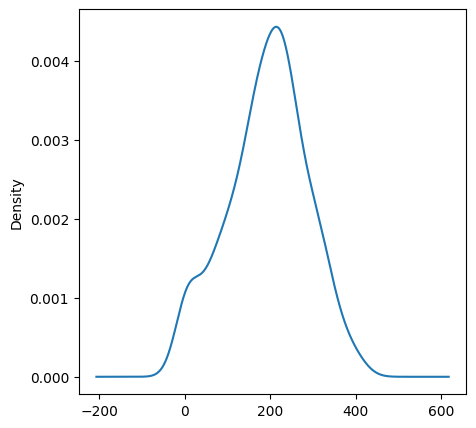

In [134]:
# - What am I doing? -
# Get density of data on ALL features

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Plot on kernel density
QuarterbackWeektoWeek2023['PASS_YDS'].plot(kind='kde')

<Axes: xlabel='PASS_YDS', ylabel='ATT'>

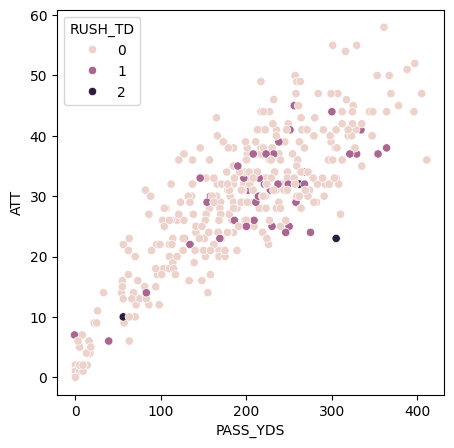

In [135]:
# - What am I doing? -
# Use seaborn to create with color
sns.scatterplot(data=QuarterbackWeektoWeek2023, x="PASS_YDS", y="ATT", hue="RUSH_TD")

In [136]:
# - What am I doing? -
# Look at value distributions

QuarterbackWeektoWeek2023['Opponent'].value_counts()#.head(10).plot()

Opponent
HOU    19
TEN    15
NO     14
MIA    13
LV     13
IND    13
DEN    13
CLE    13
SF     13
DET    12
GB     12
ATL    12
BAL    12
CHI    12
TB     12
DAL    12
KC     12
JAX    11
BUF    11
ARI    11
LAR    11
PIT    11
PHI    11
MIN    10
NYG    10
CAR    10
NE      9
SEA     9
NYJ     9
WSH     9
CIN     9
LAC     9
Name: count, dtype: int64

In [137]:
# - What am I doing? -
# Show how many unique values are in columns for runningbacks week to week.
RunningbackWeektoWeek2023.nunique()

Date               52
Opponent           32
CAR                31
RUSH_YDS          125
RUSH_AVG           94
RUSH_TD             3
RUSH_LNG           56
REC                12
TGTS               14
REC_YDS            82
REC_AVG           125
REC_TD              3
LNG_REC            54
FUM                 3
LST                 2
FF                  2
KB                  1
playerName         41
Game Result         2
Winner Score       41
Loser Score        32
OT?                 1
Home/Away           2
fantasy_points    291
REC%               24
dtype: int64

In [138]:
RunningbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD',
       'RUSH_LNG', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD', 'LNG_REC',
       'FUM', 'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

<Axes: ylabel='Frequency'>

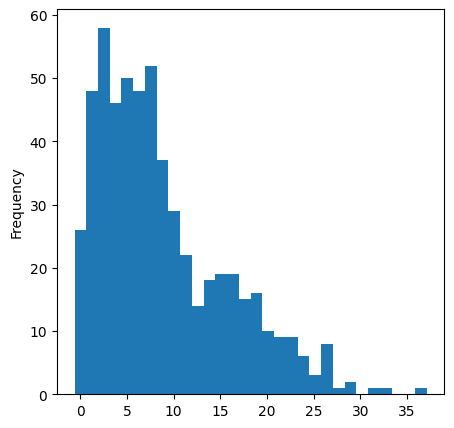

In [139]:
# - What am I doing? -
# Look at distribution of data using histogram. Play with bin size to see different views.

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Use for overall season statistics
grouped_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])
#grouped_RunningbackWeektoWeek2023 = grouped_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Plot on histogram. Use grouped_RunningbackWeektoWeek2023 (player overall season) or RunningbackWeektoWeek2023 (player per game)
grouped_RunningbackWeektoWeek2023['fantasy_points'].plot(kind='hist', bins=30)

<Axes: ylabel='Density'>

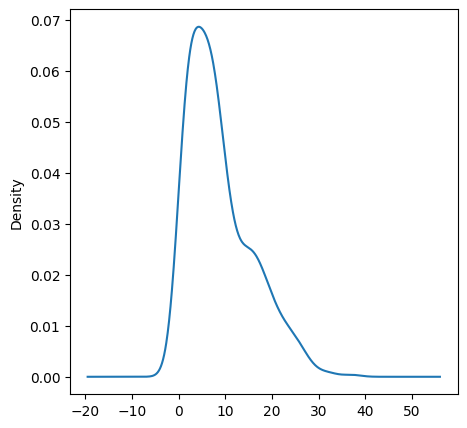

In [140]:
# - What am I doing? -
# Get density of data on ALL features

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Use for overall season statistics
grouped_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])
#grouped_RunningbackWeektoWeek2023 = grouped_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Plot on kernel density
grouped_RunningbackWeektoWeek2023['fantasy_points'].plot(kind='kde')

<Axes: xlabel='RUSH_AVG', ylabel='RUSH_TD'>

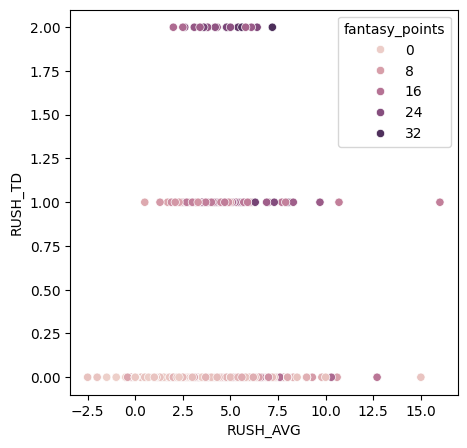

In [141]:
# - What am I doing? -
# Use seaborn to create with color
sns.scatterplot(data=RunningbackWeektoWeek2023, x="RUSH_AVG", y="RUSH_TD", hue="fantasy_points")

In [142]:
RunningbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD',
       'RUSH_LNG', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD', 'LNG_REC',
       'FUM', 'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

<Axes: xlabel='CAR'>

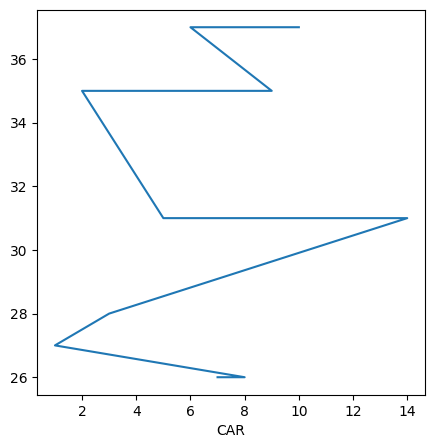

In [143]:
# - What am I doing? -
# Look at value distributions

RunningbackWeektoWeek2023['CAR'].value_counts().head(10).plot()

In [144]:
# - What am I doing? -
# Show how many unique values are in columns for receivers week to week.
ReceiverWeektoWeek2023.nunique()

Date               52
Opponent           32
REC                17
TGTS               19
REC_YDS           143
REC_AVG           183
REC_TD              4
LNG_REC            72
CAR                 5
RUSH_YDS           27
RUSH_AVG           31
LNG_RUSH           29
RUSH_TD             2
FUM                 3
LST                 3
FF                  2
KB                  1
playerName         53
Game Result         2
Winner Score       40
Loser Score        33
OT?                 1
Home/Away           2
fantasy_points    262
REC%               55
dtype: int64

<Axes: ylabel='Frequency'>

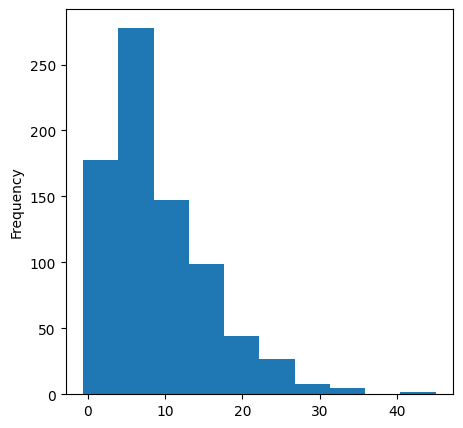

In [145]:
# - What am I doing? -
# Look at distribution of data using histogram. Play with bin size to see different views.
ReceiverWeektoWeek2023['fantasy_points'].plot(kind='hist', bins=10)

<Axes: ylabel='Density'>

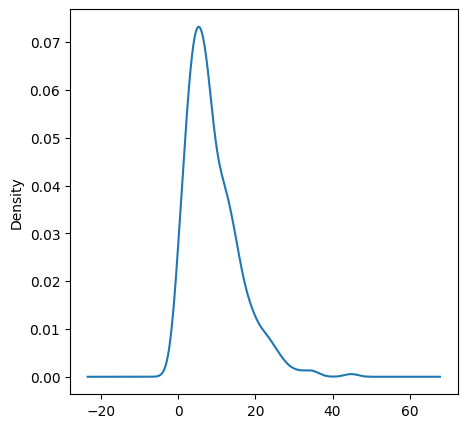

In [146]:
# - What am I doing? -
# Get density of data on ALL features

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Plot on kernel density
ReceiverWeektoWeek2023['fantasy_points'].plot(kind='kde')

<Axes: xlabel='REC_TD', ylabel='fantasy_points'>

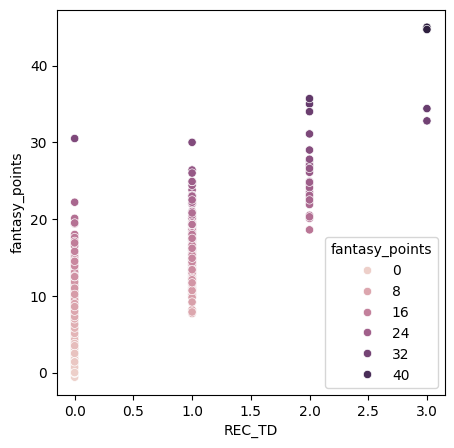

In [147]:
# - What am I doing? -
# Use seaborn to create with color
sns.scatterplot(data=ReceiverWeektoWeek2023, x="REC_TD", y="fantasy_points", hue="fantasy_points")

In [148]:
ReceiverWeektoWeek2023.columns

Index(['Date', 'Opponent', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD',
       'LNG_REC', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'LNG_RUSH', 'RUSH_TD', 'FUM',
       'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

<Axes: xlabel='Game Result'>

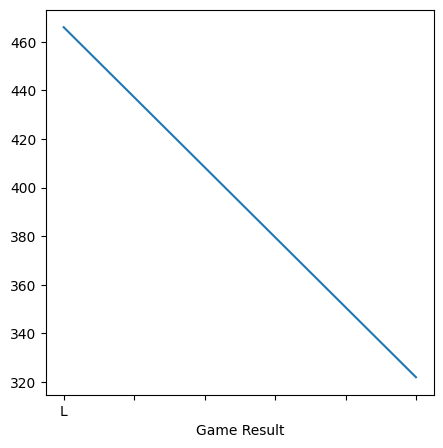

In [149]:
# - What am I doing? -
# Look at value distributions

ReceiverWeektoWeek2023['Game Result'].value_counts().head(10).plot()

## Sort values by column

In [150]:
# - What am I doing? -
# Look at most sacked passers for quarterback week to week.
QuarterbackWeektoWeek2023.sort_values(by='CMP', ascending=False).head(10)

,Date,Opponent,CMP,ATT,PASS_YDS,CMP%,PASS_AVG,PASS_TD,INT,PASS_LNG,SACK,RTG,QBR,RUSH_CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,LNG_RUSH,playerName,Game Result,Winner Score,Loser Score,OT?,Home/Away,fantasy_points
83,2023-09-24,MIN,40,47,405,0.851,8.6,3,0,35,1,123.8,95.9,2,11,5.5,0,12,Justin Herbert,W,28,24,None,Away,29.30
27,2023-10-29,PHI,39,52,397,0.750,7.6,4,1,26,1,114.0,61.7,3,11,3.7,0,5,Sam Howell,L,38,31,None,Home,31.98
20,2023-10-05,CHI,37,51,388,0.726,7.6,2,1,41,5,99.1,54.2,4,19,4.8,0,10,Sam Howell,L,40,20,None,Home,24.42
177,2023-10-08,ARI,36,46,317,0.783,6.9,3,1,63,3,108.1,61.1,4,7,1.8,0,10,Joe Burrow,W,34,20,None,Away,24.38
166,2023-10-23,SF,35,45,378,0.778,8.4,2,1,60,0,107.2,79.7,2,-1,-0.5,0,0,Kirk Cousins,W,22,17,None,Home,22.02
208,2023-09-10,PHI,35,54,316,0.648,5.9,3,1,32,2,91.3,36.1,2,15,7.5,0,8,Mac Jones,L,25,20,None,Home,25.14
360,2023-09-24,SEA,34,58,361,0.586,6.2,2,0,47,3,88.4,49.8,2,11,5.5,0,10,Andy Dalton,L,37,27,None,Away,23.54
182,2023-11-06,LAC,33,49,263,0.674,5.4,0,0,33,8,80.6,18.6,2,7,3.5,0,7,Zach Wilson,L,27,6,None,Home,11.22
36,2023-10-19,JAX,33,55,301,0.600,5.5,1,1,21,1,73.4,34.5,3,14,4.7,0,10,Derek Carr,L,31,24,None,Home,16.44
169,2023-09-10,TB,33,44,344,0.750,7.8,2,1,42,2,102.8,50.5,3,7,2.3,0,4,Kirk Cousins,L,20,17,None,Home,21.46


In [151]:
# - What am I doing? -
# Look at most sacked passers for runningbacks week to week.
RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False).head(10)

,Date,Opponent,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,FF,KB,playerName,Game Result,Winner Score,Loser Score,OT?,Home/Away,fantasy_points,REC%
89,2023-12-24,WSH,20,95,4.8,2,36,12,16,96,8.0,0,15,0,0,0,0,Breece Hall,W,30,28,None,Home,37.1,0.750000
185,2023-10-08,TEN,23,165,7.2,2,56,2,2,30,15.0,0,26,0,0,0,0,Zack Moss,W,23,16,None,Home,32.5,1.000000
423,2023-10-22,LV,16,89,5.6,2,14,3,5,31,10.3,1,17,0,0,0,0,D'Onta Foreman,W,30,12,None,Home,31.5,0.600000
141,2023-09-24,CAR,18,97,5.4,2,36,3,3,59,19.7,0,36,0,0,0,0,Kenneth Walker III,W,37,27,None,Home,29.1,1.000000
43,2024-01-07,SEA,27,150,5.6,1,29,4,4,54,13.5,0,34,0,0,0,0,James Conner,L,21,20,None,Home,28.4,1.000000
124,2023-11-19,WSH,14,83,5.9,0,36,4,5,57,14.3,2,24,0,0,0,0,Saquon Barkley,W,31,19,None,Away,28.0,0.800000
94,2023-10-08,DEN,22,177,8.0,1,72,3,3,17,5.7,0,12,0,0,0,0,Breece Hall,W,31,21,None,Away,26.9,1.000000
67,2023-12-04,JAX,19,68,3.6,2,18,6,7,49,8.2,0,28,0,0,0,0,Joe Mixon,W,34,31,OT,Away,26.7,0.857143
209,2024-01-06,HOU,30,188,6.3,1,49,2,2,8,4.0,0,6,0,0,0,0,Jonathan Taylor,L,23,19,None,Home,26.6,1.000000
88,2024-01-07,NE,37,178,4.8,1,50,2,2,12,6.0,0,11,0,0,0,0,Breece Hall,W,17,3,None,Away,26.0,1.000000


In [152]:
# - What am I doing? -
# Look at most sacked passers for receivers week to week.
ReceiverWeektoWeek2023.sort_values(by='REC_TD', ascending=False).head(10)

,Date,Opponent,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,CAR,RUSH_YDS,RUSH_AVG,LNG_RUSH,RUSH_TD,FUM,LST,FF,KB,playerName,Game Result,Winner Score,Loser Score,OT?,Home/Away,fantasy_points,REC%
261,2023-11-30,DAL,6,8,134,22.3,3,73,0,0,0.0,0,0,0,0,0,0,DK Metcalf,L,41,35,None,Away,34.4,0.750000
61,2023-10-29,ATL,4,6,128,32.0,3,61,0,0,0.0,0,0,0,0,0,0,DeAndre Hopkins,W,28,23,None,Home,32.8,0.666667
163,2023-10-05,WSH,8,10,230,28.8,3,58,0,0,0.0,0,0,0,0,0,0,DJ Moore,W,40,20,None,Away,45.0,0.800000
200,2023-10-08,ARI,15,19,192,12.8,3,63,0,0,0.0,0,0,0,0,0,0,Ja'Marr Chase,W,34,20,None,Away,44.7,0.789474
227,2023-12-31,IND,13,21,126,9.7,2,24,0,0,0.0,0,0,0,0,0,0,Davante Adams,L,23,20,None,Away,31.1,0.619048
597,2023-11-05,TB,6,11,114,19.0,2,29,2,2,1.0,2,0,0,0,0,0,Tank Dell,W,39,37,None,Home,26.6,0.545455
778,2023-10-01,CLE,5,5,80,16.0,2,36,0,0,0.0,0,0,0,0,0,0,Mark Andrews,W,28,3,None,Away,22.5,1.000000
773,2023-10-22,DET,4,6,63,15.8,2,22,0,0,0.0,0,0,0,0,0,0,Mark Andrews,W,38,6,None,Home,20.3,0.666667
744,2023-10-01,SF,7,7,76,10.9,2,33,0,0,0.0,0,0,0,0,0,0,Michael Wilson,L,35,16,None,Away,23.1,1.000000
361,2023-12-10,CLE,11,12,95,8.6,2,23,0,0,0.0,0,0,0,0,0,0,Evan Engram,L,31,27,None,Away,27.0,0.916667


## Correlation with heat maps

In [153]:
# - What am I doing? -
# Look at correlations for quarterbacks

# Remove text columns for correlation statistics.
Correlation_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away'])

# Looking at correlations between numeric values.
Correlation_QuarterbackWeektoWeek2023.corr()

ValueError: could not convert string to float: '-'

In [ ]:
# - What am I doing? -
# Projecting correlations for quarterbacks individual games in a heatmap

# Remove text columns for correlation statistics.
Correlation_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away',
                                                                               'Winner Score', 'Loser Score'])

# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_QuarterbackWeektoWeek2023.corr(), annot=True)

plt.rcParams['figure.figsize'] = (9, 9)

plt.show()

In [154]:
# - What am I doing? -
# Projecting correlations for quarterback's overall season in a heatmap

# Remove text columns for correlation statistics.
Correlation_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away',
                                                                               'Winner Score', 'Loser Score'])

# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_QuarterbackWeektoWeek2023.groupby('playerName').sum().corr(), annot=True)

plt.rcParams['figure.figsize'] = (9, 9)

plt.show()

ValueError: could not convert string to float: '74.611.215.118.081.67.863.677.388.639.647.4'

In [155]:
# - What am I doing? -
# Look at correlations for runningbacks

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away', 'FF', 'KB'])

# Looking at correlations between numeric values.
Correlation_RunningbackWeektoWeek2023.corr()

,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,Winner Score,Loser Score,fantasy_points,REC%
CAR,1.000000,0.837828,0.099796,0.403338,0.458356,0.194335,0.228042,0.183389,0.153715,0.146278,0.200625,0.044727,-0.003580,-0.100629,0.008094,0.693951,-0.080432
RUSH_YDS,0.837828,1.000000,0.494412,0.434576,0.760996,0.118152,0.144737,0.120353,0.119342,0.116429,0.134357,0.037602,-0.007045,-0.021503,0.057164,0.749526,-0.066273
RUSH_AVG,0.099796,0.494412,1.000000,0.141665,0.659074,-0.002967,0.008425,0.003041,0.017681,0.027689,-0.005708,0.038483,0.021839,0.103364,0.045150,0.304032,-0.031533
RUSH_TD,0.403338,0.434576,0.141665,1.000000,0.351141,0.043012,0.071426,0.109458,0.116886,-0.039914,0.093731,-0.050571,-0.049168,0.116050,0.203221,0.690740,-0.057381
RUSH_LNG,0.458356,0.760996,0.659074,0.351141,1.000000,0.052751,0.086666,0.063536,0.065737,0.055567,0.056464,0.027985,-0.015139,0.063234,0.061143,0.559266,-0.081817
REC,0.194335,0.118152,-0.002967,0.043012,0.052751,1.000000,0.938393,0.749149,0.259344,0.233602,0.508345,0.066863,0.003622,0.000838,0.043627,0.482842,0.345699
TGTS,0.228042,0.144737,0.008425,0.071426,0.086666,0.938393,1.000000,0.712076,0.250001,0.209022,0.479563,0.073586,0.019655,0.018420,0.046149,0.482293,0.025981
REC_YDS,0.183389,0.120353,0.003041,0.109458,0.063536,0.749149,0.712076,1.000000,0.669349,0.354273,0.850923,0.051402,-0.016274,0.035988,0.118287,0.577011,0.236342
REC_AVG,0.153715,0.119342,0.017681,0.116886,0.065737,0.259344,0.250001,0.669349,1.000000,0.276981,0.840505,0.016873,-0.028938,0.020133,0.123204,0.399961,0.180205
REC_TD,0.146278,0.116429,0.027689,-0.039914,0.055567,0.233602,0.209022,0.354273,0.276981,1.000000,0.353427,0.006368,0.054378,0.026067,0.050762,0.404448,0.072712


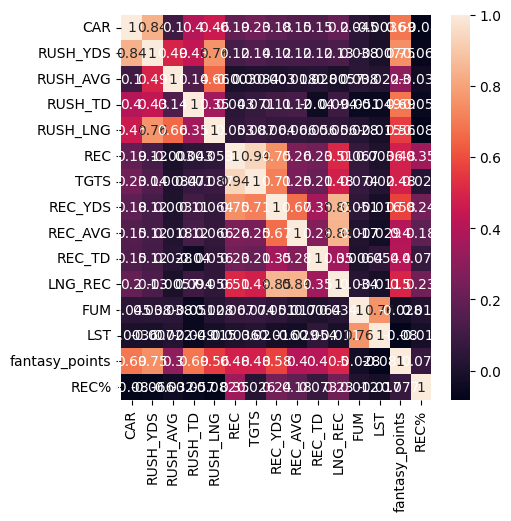

In [156]:
# - What am I doing? -
# Visualize correlations for runningbacks week to week.

# Good step to understand what your focus should be on during data analysis.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away', 'FF', 'KB',
                                                                               'Winner Score', 'Loser Score'])


# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
#Correlation_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False).head(10)

sns.heatmap(Correlation_RunningbackWeektoWeek2023.corr(), annot=True)

plt.rcParams['figure.figsize'] = (11, 11)

plt.show()

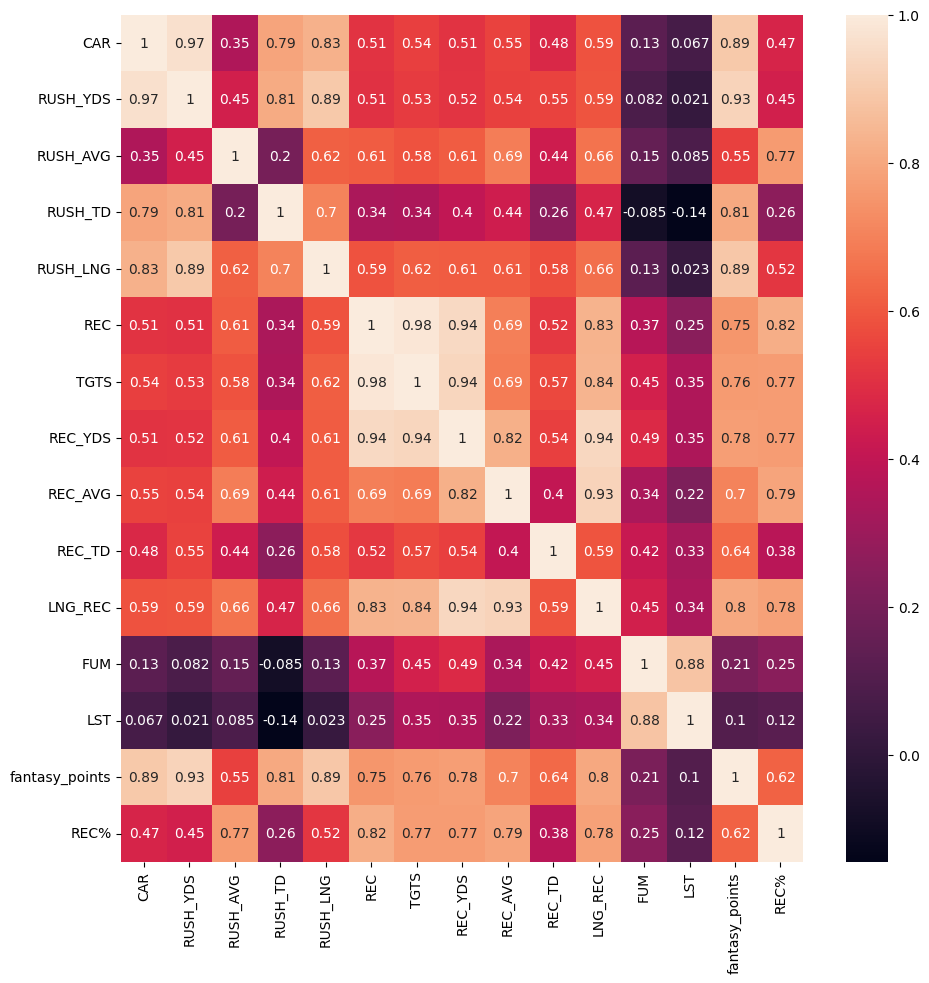

In [157]:
# - What am I doing? -
# Visualize correlations for runningbacks overall season.


# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB',
                                                                               'Winner Score', 'Loser Score'])

# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
#Correlation_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=True).head(40)

# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 12)

plt.show()

In [158]:
# - What am I doing? -
# Look at correlations for receivers

# Remove text columns for correlation statistics.
Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away',
                                                                         'Winner Score', 'Loser Score', 'KB'])

# Looking at correlations between numeric values.
Correlation_ReceiverWeektoWeek2023.corr()

,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,CAR,RUSH_YDS,RUSH_AVG,LNG_RUSH,RUSH_TD,FUM,LST,FF,fantasy_points,REC%
REC,1.000000,0.866903,0.784502,0.004469,0.314171,0.338894,-0.041480,-0.056628,-0.050093,-0.045511,0.012202,0.177678,0.134290,0.009601,0.749745,0.438887
TGTS,0.866903,1.000000,0.696029,0.010651,0.272196,0.302142,-0.026662,-0.052184,-0.043425,-0.040205,0.015068,0.133079,0.109960,0.015034,0.658872,0.026230
REC_YDS,0.784502,0.696029,1.000000,0.495292,0.445237,0.736050,-0.064064,-0.077361,-0.067214,-0.072427,-0.011557,0.108539,0.086453,-0.000583,0.886614,0.338744
REC_AVG,0.004469,0.010651,0.495292,1.000000,0.266169,0.783275,-0.031756,-0.034855,-0.022131,-0.037777,-0.005583,-0.025902,-0.011352,-0.009052,0.391577,0.125538
REC_TD,0.314171,0.272196,0.445237,0.266169,1.000000,0.367087,0.006835,-0.030645,-0.025861,-0.030248,0.007671,0.008801,0.001911,-0.018648,0.779243,0.137437
LNG_REC,0.338894,0.302142,0.736050,0.783275,0.367087,1.000000,-0.046897,-0.030575,-0.029502,-0.032477,0.006734,0.016263,0.035239,0.005333,0.630748,0.236807
CAR,-0.041480,-0.026662,-0.064064,-0.031756,0.006835,-0.046897,1.000000,0.614885,0.481053,0.604054,0.270431,0.015311,-0.021161,-0.010461,0.020541,-0.035857
RUSH_YDS,-0.056628,-0.052184,-0.077361,-0.034855,-0.030645,-0.030575,0.614885,1.000000,0.883218,0.982803,0.416265,-0.010205,-0.009203,-0.005913,0.026392,-0.017448
RUSH_AVG,-0.050093,-0.043425,-0.067214,-0.022131,-0.025861,-0.029502,0.481053,0.883218,1.000000,0.919641,0.387512,-0.013213,-0.013823,-0.006037,0.026303,-0.008542
LNG_RUSH,-0.045511,-0.040205,-0.072427,-0.037777,-0.030248,-0.032477,0.604054,0.982803,0.919641,1.000000,0.431767,-0.011905,-0.017063,-0.006101,0.031886,-0.010758


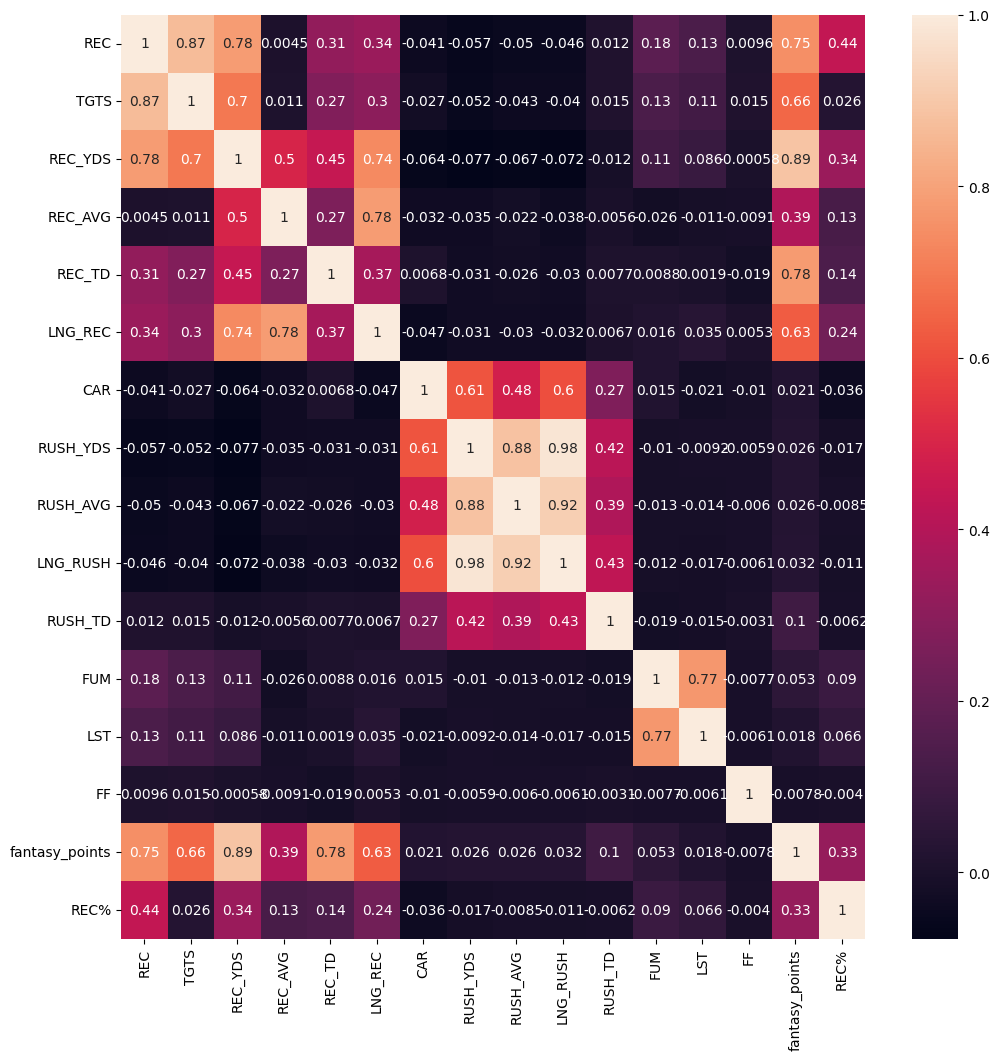

In [159]:
# - What am I doing? -
# Visualize correlations for receivers week to week.

# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_ReceiverWeektoWeek2023.corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 15)

plt.show()

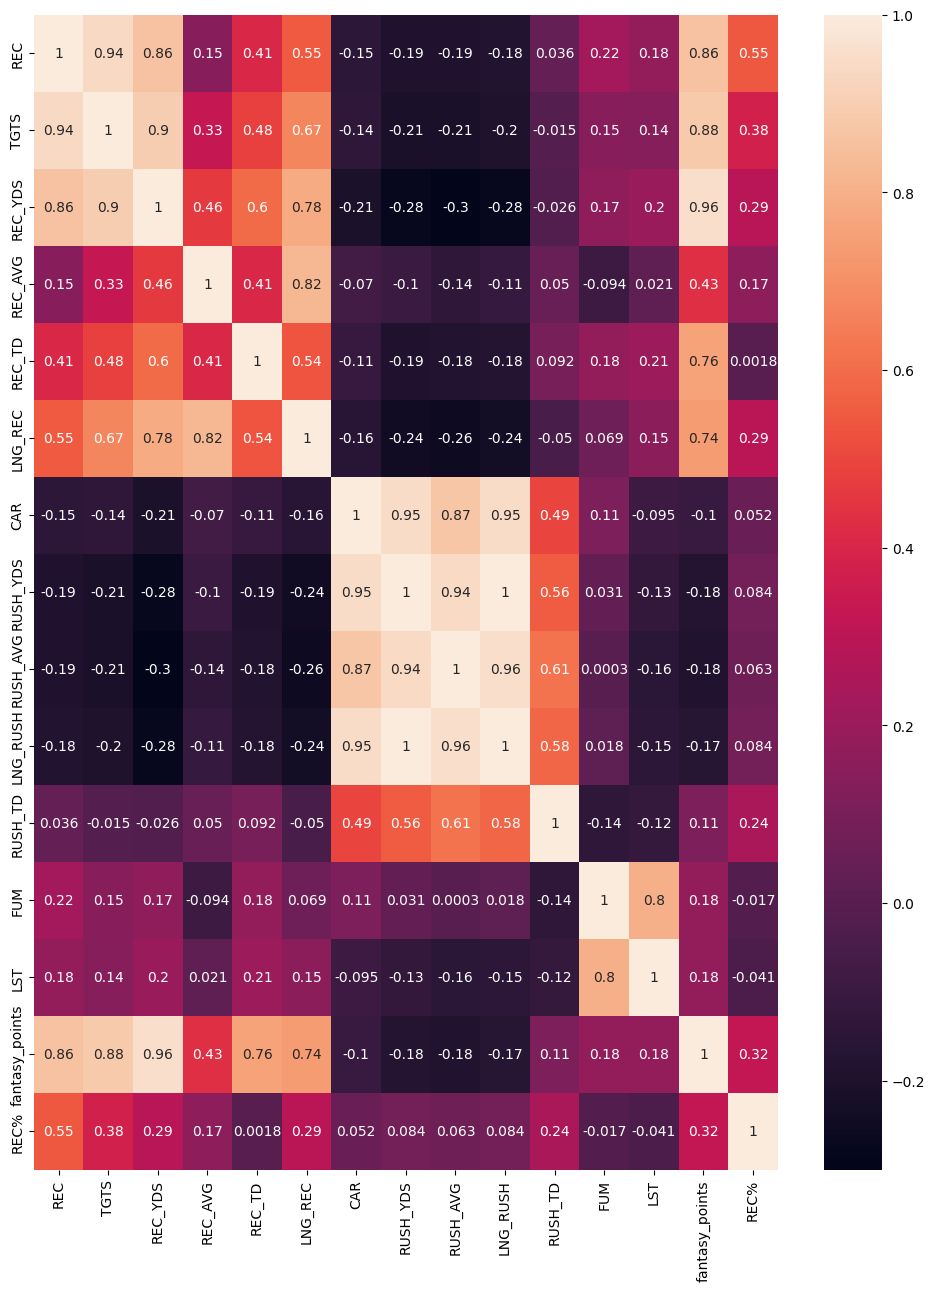

In [160]:
# - What am I doing? -
# Visualize correlations for receivers overall season.

# Remove text columns for correlation statistics.
Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB',
                                                                         'Winner Score', 'Loser Score'])
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 12)

plt.show()

## Group by

In [161]:
# - What am I doing? -
# Use Groupby function for quarterbacks to summarize data and explore.

# Remove text columns for group by statistics.
Groupby_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])

# Group columns to look at Quarterback WeektoWeek 2023 dataset closer.
Groupby_QuarterbackWeektoWeek2023.groupby('playerName').mean().sort_values(by='PASS_YDS', ascending=False).head(20)

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# - What am I doing? -
# Use Groupby function for runningbacks to summarize data and explore.


# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at Passing Leaders for 2023 dataset closer.
Groupby_RunningbackWeektoWeek2023.groupby('playerName').mean().sort_values(by=['RUSH_YDS'], ascending=False).head(10)

In [ ]:
# - What am I doing? -
# Use Groupby function for receivers to summarize data and explore.


# Remove text columns for group by statistics.
Groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_YDS', ascending=False)

## String Contains

In [162]:
# - What am I doing? -
# Search for specific strings in data for quarterbacks.

# Look at rows that contain specified string in column.
QuarterbackWeektoWeek2023[QuarterbackWeektoWeek2023['playerName'].str.contains('Allen')]

,Date,Opponent,CMP,ATT,PASS_YDS,CMP%,PASS_AVG,PASS_TD,INT,PASS_LNG,SACK,RTG,QBR,RUSH_CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,LNG_RUSH,playerName,Game Result,Winner Score,Loser Score,OT?,Home/Away,fantasy_points


In [163]:
# - What am I doing? -
# Search for specific strings in data for runningbacks.


# Look at rows that contain specified string in column.
RunningbackWeektoWeek2023[RunningbackWeektoWeek2023['playerName'].str.contains('Mahomes')]

,Date,Opponent,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,FF,KB,playerName,Game Result,Winner Score,Loser Score,OT?,Home/Away,fantasy_points,REC%


In [164]:
# - What am I doing? -
# Search for specific strings in data for receivers.


# Look at rows that contain specified string in column.
ReceiverWeektoWeek2023[ReceiverWeektoWeek2023['Opponent'].str.contains('DEN')]

,Date,Opponent,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,CAR,RUSH_YDS,RUSH_AVG,LNG_RUSH,RUSH_TD,FUM,LST,FF,KB,playerName,Game Result,Winner Score,Loser Score,OT?,Home/Away,fantasy_points,REC%
0,2023-12-10,DEN,6,12,68,11.3,0,22,0,0,0.0,0,0,0,0,0,0,Keenan Allen,L,24,7,None,Home,9.8,0.500000
28,2024-01-07,DEN,3,5,61,20.3,1,33,1,5,5.0,5,1,0,0,0,0,Jakobi Meyers,W,27,14,None,Home,20.1,0.600000
43,2023-09-10,DEN,9,10,81,9.0,2,21,0,0,0.0,0,0,0,0,0,0,Jakobi Meyers,W,17,16,None,Away,24.6,0.900000
172,2023-10-01,DEN,8,9,131,16.4,1,29,0,0,0.0,0,0,0,0,0,0,DJ Moore,L,31,28,None,Home,23.1,0.888889
218,2024-01-07,DEN,5,8,46,9.2,1,17,0,0,0.0,0,0,0,0,0,0,Davante Adams,W,27,14,None,Home,13.1,0.625000
226,2023-09-10,DEN,6,9,66,11.0,0,18,0,0,0.0,0,0,0,0,0,0,Davante Adams,W,17,16,None,Away,9.6,0.666667
299,2023-10-08,DEN,3,7,54,18.0,0,32,0,0,0.0,0,0,0,0,0,0,Garrett Wilson,W,31,21,None,Away,6.9,0.428571
358,2023-09-17,DEN,5,6,54,10.8,1,30,0,0,0.0,0,0,0,0,0,0,Terry McLaurin,W,35,33,None,Away,13.9,0.833333
376,2023-11-19,DEN,4,7,55,13.8,0,29,0,0,0.0,0,0,0,0,0,0,T.J. Hockenson,L,21,20,None,Away,7.5,0.571429
392,2023-11-19,DEN,3,6,44,14.7,0,18,0,0,0.0,0,0,0,0,0,0,Jordan Addison,L,21,20,None,Away,5.9,0.500000


## Pair Plots

In [165]:
QuarterbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CMP', 'ATT', 'PASS_YDS', 'CMP%', 'PASS_AVG',
       'PASS_TD', 'INT', 'PASS_LNG', 'SACK', 'RTG', 'QBR', 'RUSH_CAR',
       'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD', 'LNG_RUSH', 'playerName',
       'Game Result', 'Winner Score', 'Loser Score', 'OT?', 'Home/Away',
       'fantasy_points'],
      dtype='object')

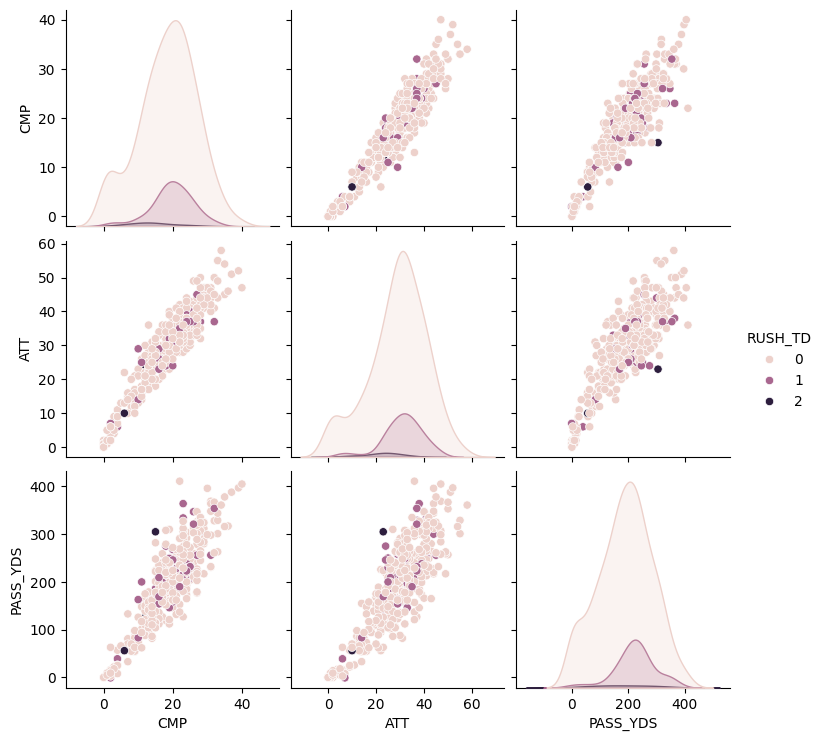

In [166]:
# - What am I doing? -
# What if we want to compare more than two features?

# Pick columns to use for plot
MultiScatter_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023[['CMP','ATT','PASS_YDS', 'RUSH_TD']]

# Use pairplot to compare more features
sns.pairplot(MultiScatter_QuarterbackWeektoWeek2023, hue="RUSH_TD")

In [167]:
# - What am I doing? -
# Look at columns

RunningbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD',
       'RUSH_LNG', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD', 'LNG_REC',
       'FUM', 'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

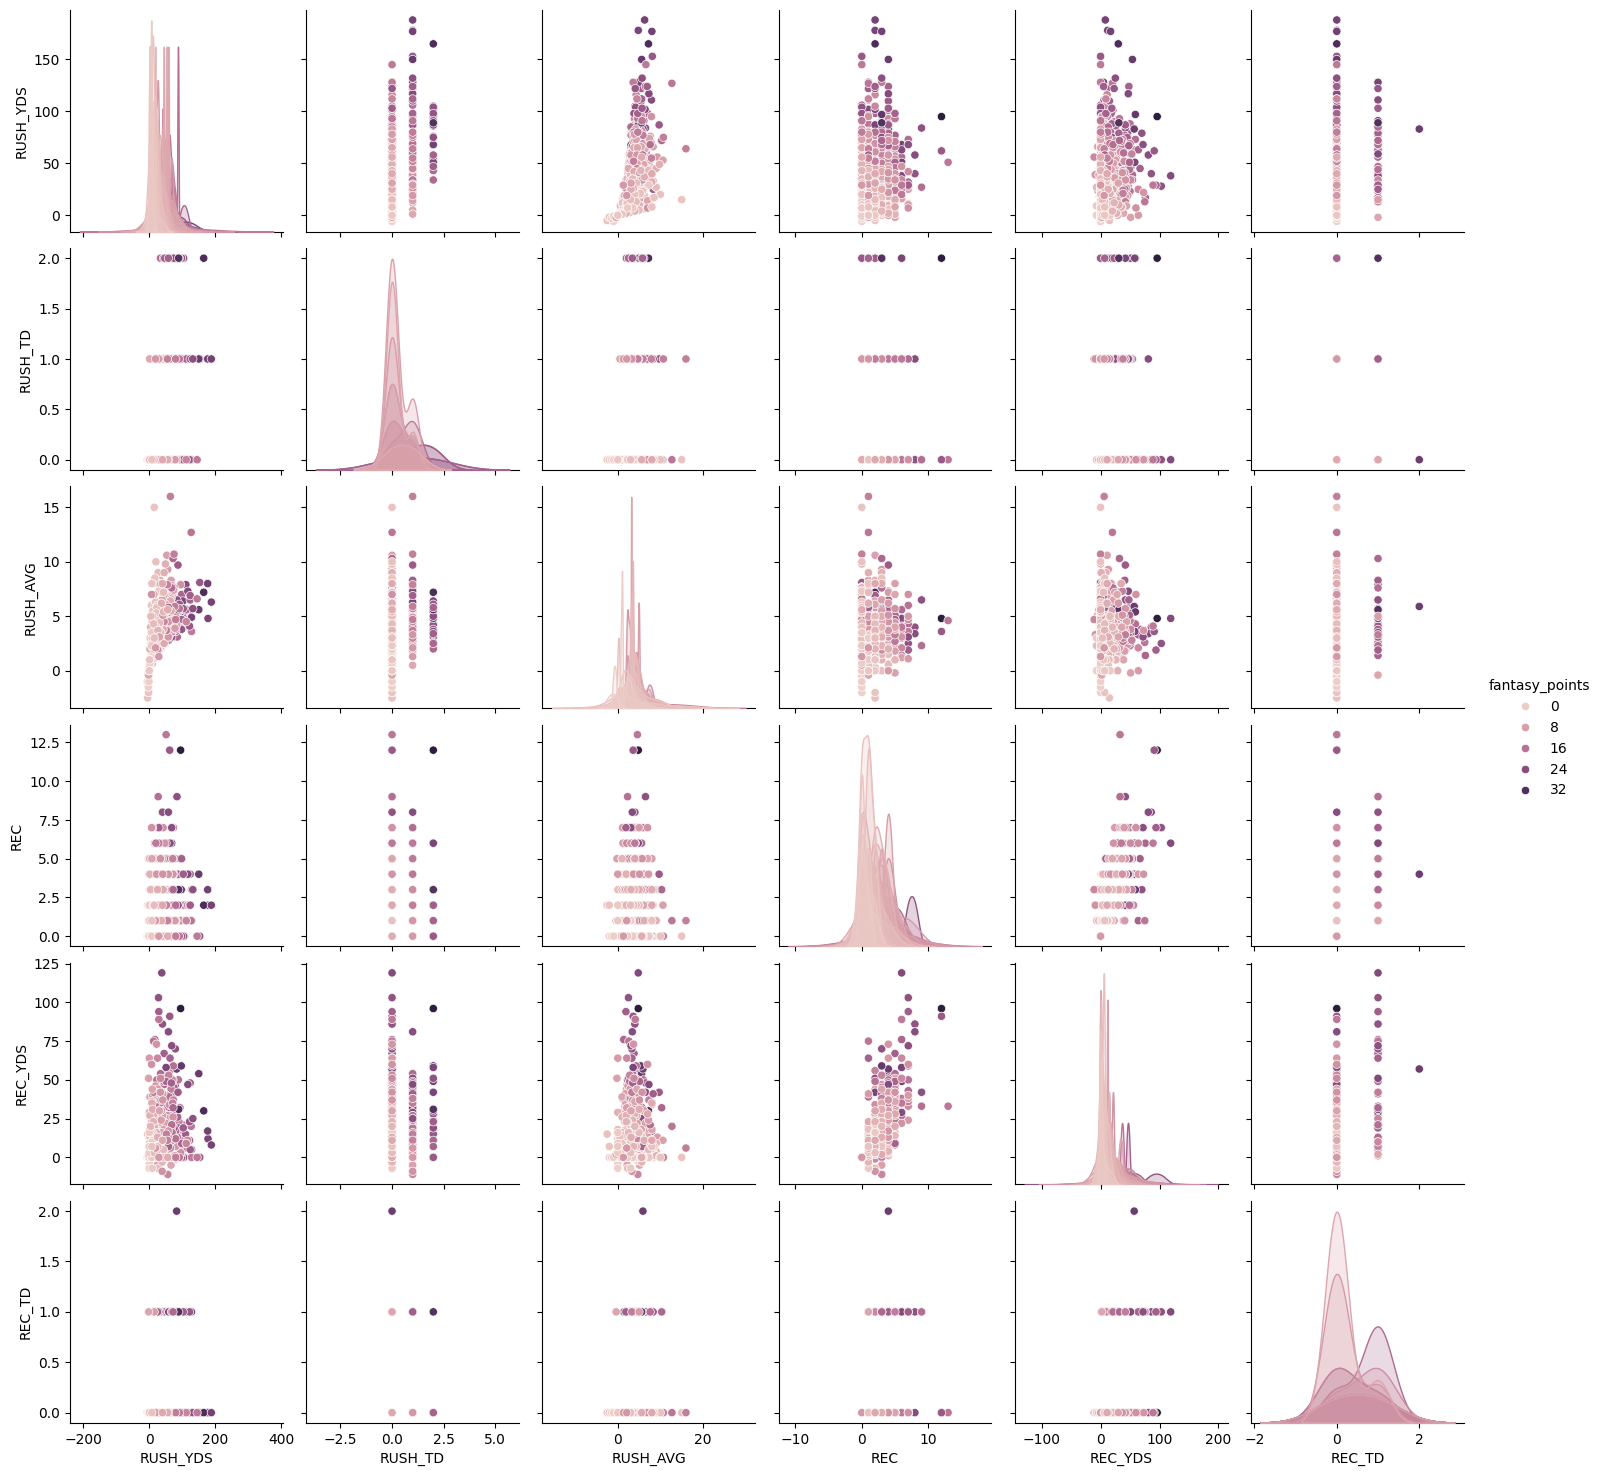

In [168]:
# - What am I doing? -
# What if we want to compare more than two features?

# Pick columns to use for plot
MultiScatter_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023[['RUSH_YDS', 'RUSH_TD', 'RUSH_AVG', 'REC', 'REC_YDS', 'REC_TD', 'fantasy_points']]

# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
# MultiScatter_RunningbackWeektoWeek2023 = MultiScatter_RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False).head(20)


# Use pairplot to compare more features
sns.pairplot(MultiScatter_RunningbackWeektoWeek2023, hue="fantasy_points")

In [169]:
# - What am I doing? -
# Look at columns

ReceiverWeektoWeek2023.columns

Index(['Date', 'Opponent', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD',
       'LNG_REC', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'LNG_RUSH', 'RUSH_TD', 'FUM',
       'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

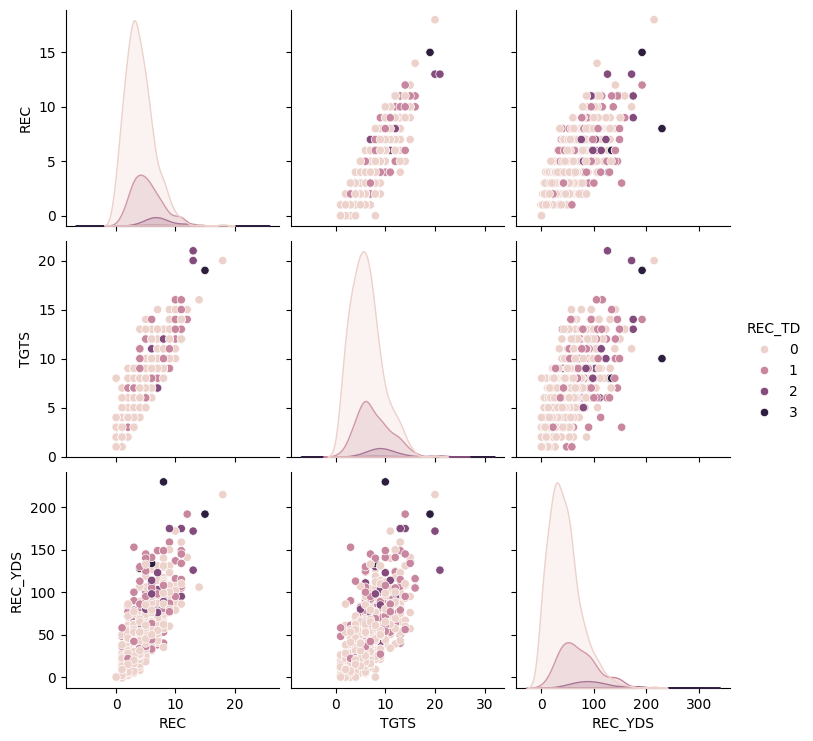

In [170]:
# - What am I doing? -
# What if we want to compare more than two features?

# Pick columns to use for plot
MultiScatter_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023[['REC','TGTS','REC_YDS', 'REC_TD']]

# Use pairplot to compare more features
sns.pairplot(MultiScatter_ReceiverWeektoWeek2023, hue="REC_TD")

## Box Plots

<Axes: >

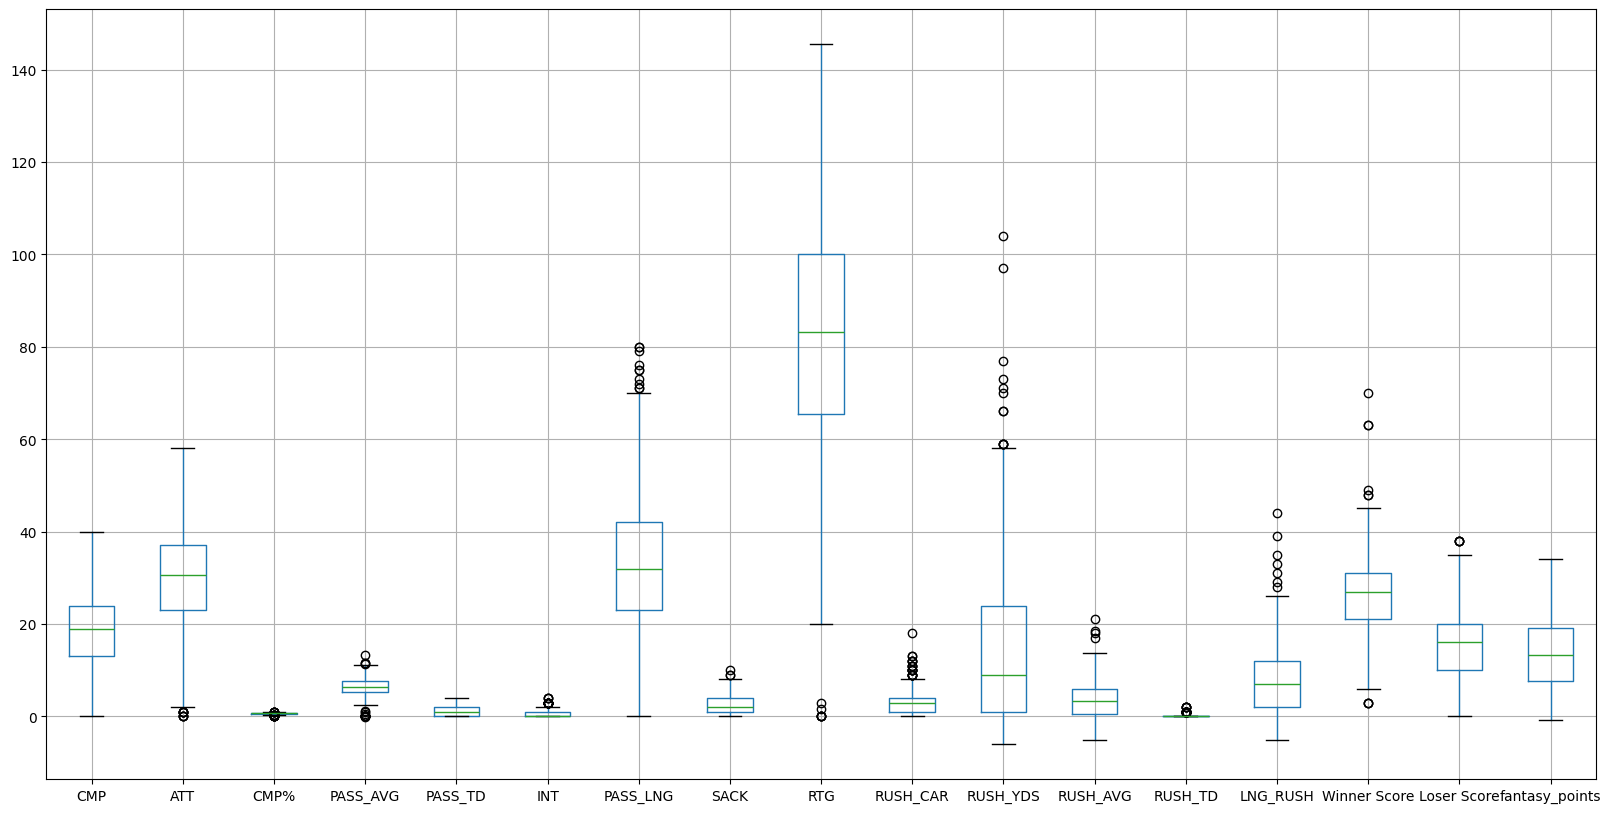

In [171]:
# - What am I doing? -
# Look for high level info about quarterbacks with a box plot

# Use this line to remove large column values that distort boxplot view
BP_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['QBR', 'PASS_YDS'])

# Look at boxplots to find outliers.
BP_QuarterbackWeektoWeek2023.boxplot(figsize=(20,10))

<Axes: >

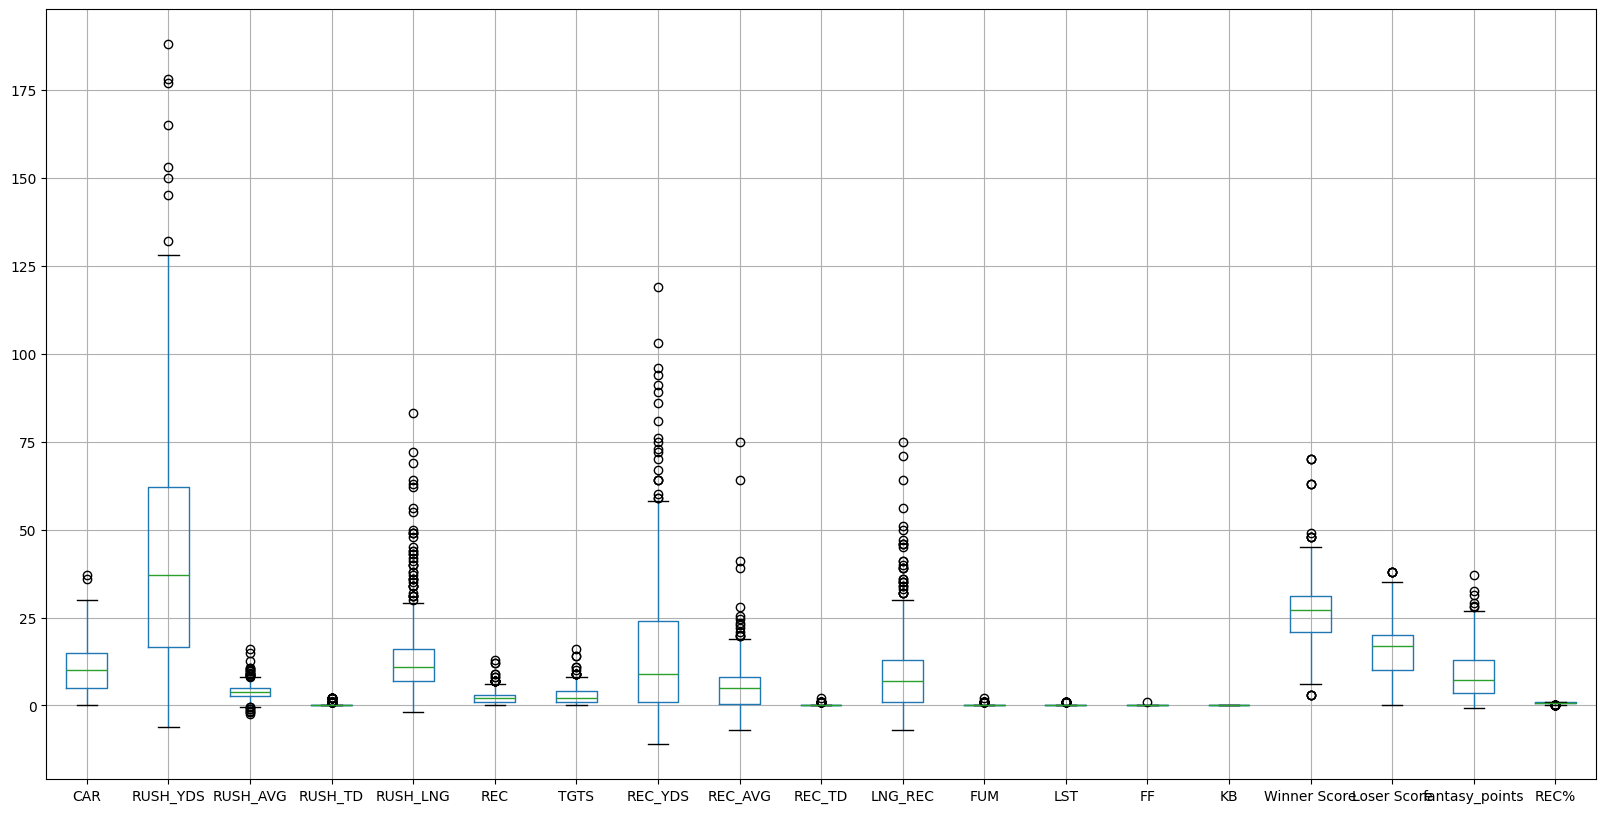

In [172]:
# - What am I doing? -
# Look for high level info about runningbacks with a box plot


# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# IF need to see boxplot by season instead of by game
# Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Look at boxplots to find outliers.
Groupby_RunningbackWeektoWeek2023.boxplot(figsize=(20,10))

<Axes: >

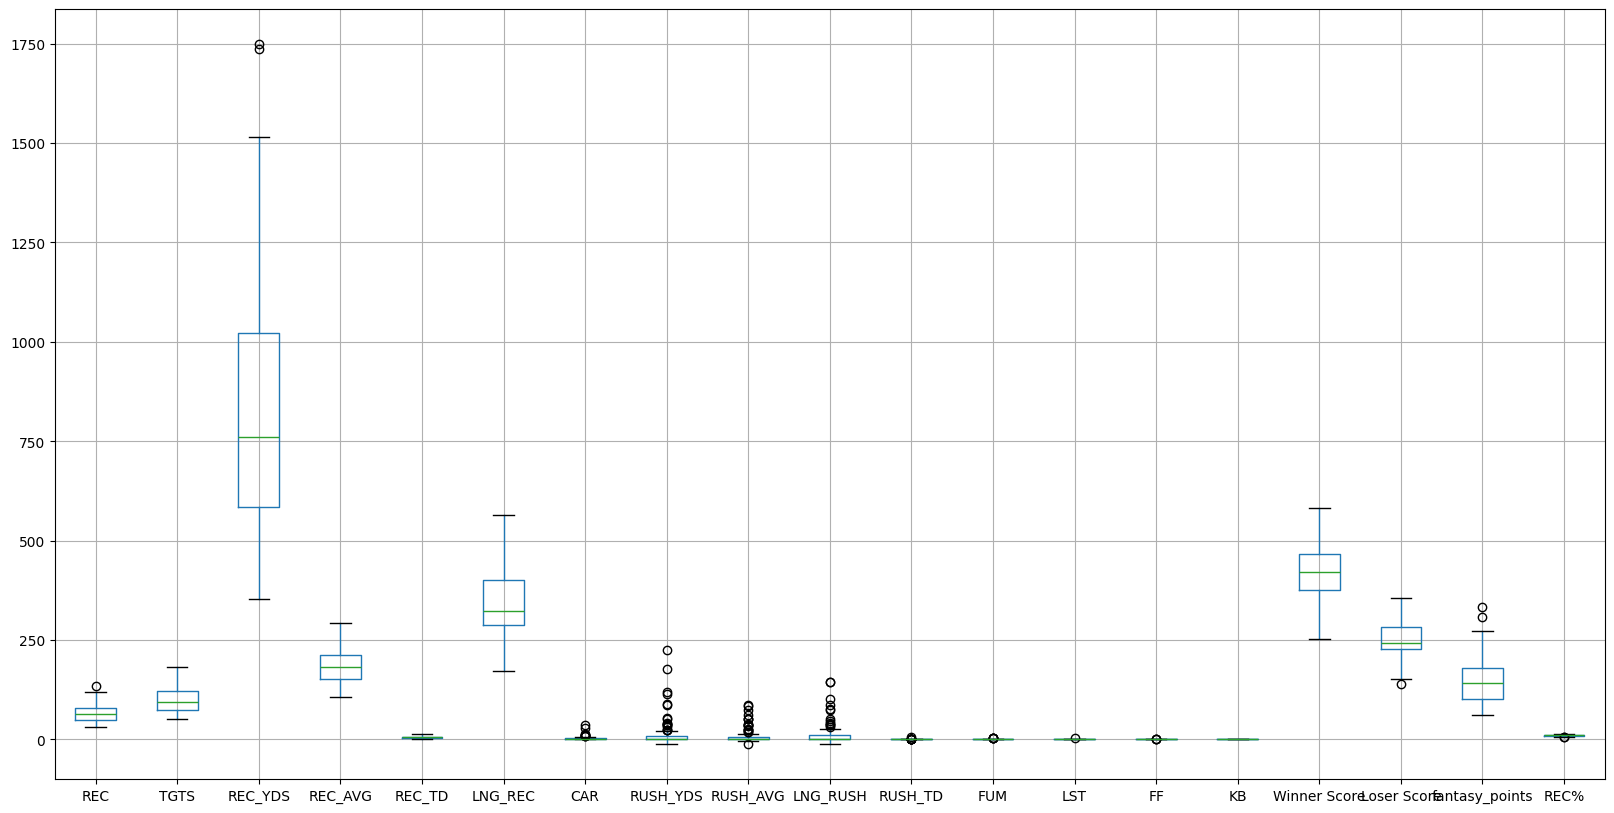

In [173]:
# - What am I doing? -
# Look for high level info about receivers with a box plot

# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# IF need to see boxplot by season instead of by game
Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Look at boxplots to find outliers.
Groupby_ReceiverWeektoWeek2023.boxplot(figsize=(20,10))

## Quarterback Exploration Questions

In [174]:
# 1. QBs get double the amount of TDs than RBs and WRs

In [175]:
# Week to Week

# QB Week to Week Mean TD
print('Week to Week Quarterback: ', QuarterbackWeektoWeek2023['PASS_TD'].mean())

# RB Week to Week Mean TD
print('Week to Week Runningback: ', RunningbackWeektoWeek2023['RUSH_TD'].mean())

# WR Week to Week Mean TD
print('Week to Week Receiver: ', ReceiverWeektoWeek2023['REC_TD'].mean())


# Overall Season
# Remove text columns for group by statistics.
Groupby_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_QuarterbackWeektoWeek2023 = Groupby_QuarterbackWeektoWeek2023.groupby('playerName').sum()

print('Overall Season Quarterback: ', Groupby_QuarterbackWeektoWeek2023['PASS_TD'].mean())


# Overall Season
# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

print('Overall Season Runningback: ', Groupby_RunningbackWeektoWeek2023['RUSH_TD'].mean())


# Overall Season
# Remove text columns for group by statistics.
Groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_ReceiverWeektoWeek2023 = Groupby_ReceiverWeektoWeek2023.groupby('playerName').sum()

print('Overall Season Receiver: ', Groupby_ReceiverWeektoWeek2023['REC_TD'].mean())

# Conclusion: QBs get triple the amount of TDs that RBs and WRs get on average

Week to Week Quarterback:  1.0053763440860215
Week to Week Runningback:  0.25528169014084506
Week to Week Receiver:  0.28553299492385786
Overall Season Quarterback:  8.904761904761905
Overall Season Runningback:  3.5365853658536586
Overall Season Receiver:  4.245283018867925


In [176]:
QuarterbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CMP', 'ATT', 'PASS_YDS', 'CMP%', 'PASS_AVG',
       'PASS_TD', 'INT', 'PASS_LNG', 'SACK', 'RTG', 'QBR', 'RUSH_CAR',
       'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD', 'LNG_RUSH', 'playerName',
       'Game Result', 'Winner Score', 'Loser Score', 'OT?', 'Home/Away',
       'fantasy_points'],
      dtype='object')

In [177]:
# 2. QBs throw alot of interceptions. Therefore, we should consider this in analysis. Does this result in worse scoring QBs?

# Find Top 10 Interception QB for the season

# Remove text columns for group by statistics.
Groupby_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
INT_Groupby_QuarterbackWeektoWeek2023 = Groupby_QuarterbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='INT', ascending=False).head(10)

# Find Top 10 fantasy scoring QB for the season
TD_Groupby_QuarterbackWeektoWeek2023 = Groupby_QuarterbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10)

# Compare the two lists
merged_data = pd.merge(INT_Groupby_QuarterbackWeektoWeek2023, TD_Groupby_QuarterbackWeektoWeek2023, on='playerName', how='inner')

merged_data

# Conclusion: About half of players in Top INT throwing QBs are in Top 10 scoring players. While INTs may influence overall results, it is
# not the key decider in success of QB

,CMP_x,ATT_x,PASS_YDS_x,CMP%_x,PASS_AVG_x,PASS_TD_x,INT_x,PASS_LNG_x,SACK_x,RTG_x,QBR_x,RUSH_CAR_x,RUSH_YDS_x,RUSH_AVG_x,RUSH_TD_x,LNG_RUSH_x,Winner Score_x,Loser Score_x,fantasy_points_x,CMP_y,ATT_y,PASS_YDS_y,CMP%_y,PASS_AVG_y,PASS_TD_y,INT_y,PASS_LNG_y,SACK_y,RTG_y,QBR_y,RUSH_CAR_y,RUSH_YDS_y,RUSH_AVG_y,RUSH_TD_y,LNG_RUSH_y,Winner Score_y,Loser Score_y,fantasy_points_y
playerName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sam Howell,388,612,3946,10.433,105.3,21,21,542,65,1278.5,31.52.016.659.771.820.754.212.132.520.027.451....,48,263,96.9,5,185,535,312,277.14,388,612,3946,10.433,105.3,21,21,542,65,1278.5,31.52.016.659.771.820.754.212.132.520.027.451....,48,263,96.9,5,185,535,312,277.14
Trevor Lawrence,322,497,3494,9.170,100.0,19,14,559,28,1227.9,42.353.055.891.170.457.815.014.351.371.116.181...,55,266,67.7,4,140,411,236,252.36,322,497,3494,9.170,100.0,19,14,559,28,1227.9,42.353.055.891.170.457.815.014.351.371.116.181...,55,266,67.7,4,140,411,236,252.36
Desmond Ridder,230,357,2645,9.223,99.7,11,10,475,27,1171.5,62.514.046.466.662.079.611.725.914.055.337.713...,52,187,42.3,5,106,343,223,188.50,230,357,2645,9.223,99.7,11,10,475,27,1171.5,62.514.046.466.662.079.611.725.914.055.337.713...,52,187,42.3,5,106,343,223,188.50
Joshua Dobbs,262,417,2464,8.195,76.8,13,10,396,30,1051.1,19.662.188.638.78.484.517.323.289.239.016.480....,77,421,70.5,6,206,319,216,218.66,262,417,2464,8.195,76.8,13,10,396,30,1051.1,19.662.188.638.78.484.517.323.289.239.016.480....,77,421,70.5,6,206,319,216,218.66
Justin Fields,227,370,2562,7.964,90.9,16,9,475,44,1088.9,57.963.463.770.275.316.219.265.216.740.712.375...,124,657,67.1,4,215,368,216,247.18,227,370,2562,7.964,90.9,16,9,475,44,1088.9,57.963.463.770.275.316.219.265.216.740.712.375...,124,657,67.1,4,215,368,216,247.18
Geno Smith,323,499,3624,9.677,107.1,20,9,598,31,1372.1,74.175.614.847.153.739.254.544.675.191.561.713...,37,155,61.5,1,116,415,270,237.46,323,499,3624,9.677,107.1,20,9,598,31,1372.1,74.175.614.847.153.739.254.544.675.191.561.713...,37,155,61.5,1,116,415,270,237.46


## Runningback Exploration Questions

In [178]:
RunningbackWeektoWeek2023.sort_values(by='RUSH_YDS', ascending=False)

,Date,Opponent,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,FF,KB,playerName,Game Result,Winner Score,Loser Score,OT?,Home/Away,fantasy_points,REC%
209,2024-01-06,HOU,30,188,6.3,1,49,2,2,8,4.0,0,6,0,0,0,0,Jonathan Taylor,L,23,19,None,Home,26.6,1.000000
88,2024-01-07,NE,37,178,4.8,1,50,2,2,12,6.0,0,11,0,0,0,0,Breece Hall,W,17,3,None,Away,26.0,1.000000
94,2023-10-08,DEN,22,177,8.0,1,72,3,3,17,5.7,0,12,0,0,0,0,Breece Hall,W,31,21,None,Away,26.9,1.000000
185,2023-10-08,TEN,23,165,7.2,2,56,2,2,30,15.0,0,26,0,0,0,0,Zack Moss,W,23,16,None,Home,32.5,1.000000
0,2024-01-07,JAX,19,153,8.1,1,69,0,0,0,0.0,0,0,0,0,0,0,Derrick Henry,W,28,20,None,Home,21.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2023-11-05,NYG,4,-2,-0.5,0,5,0,0,0,0.0,0,0,0,0,0,0,Zamir White,W,30,6,None,Home,-0.2,NaN
179,2023-09-17,BUF,9,-2,-0.2,0,3,5,6,51,10.2,0,12,0,0,0,0,Josh Jacobs,L,38,10,None,Away,7.4,0.833333
535,2023-10-15,CLE,2,-3,-1.5,0,0,0,0,0,0.0,0,0,0,0,0,0,Elijah Mitchell,L,19,17,None,Away,-0.3,NaN
408,2023-11-09,CHI,2,-5,-2.5,0,1,2,2,15,7.5,0,13,0,0,0,0,Miles Sanders,L,16,13,None,Away,2.0,1.000000


In [179]:
# 1a. Who are responsible for outlier rushing yard games? (No Outlier Rushing Yards seasons)

Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Assuming you have a DataFrame 'data' with a column 'value' containing your data
# Calculate the IQR (Interquartile Range)
Q1 = Groupby_RunningbackWeektoWeek2023['RUSH_YDS'].quantile(0.25)
Q3 = Groupby_RunningbackWeektoWeek2023['RUSH_YDS'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the lower and upper bounds
outliers = Groupby_RunningbackWeektoWeek2023[Groupby_RunningbackWeektoWeek2023['RUSH_YDS'] > upper_bound]

outliers.sort_values(by='RUSH_YDS', ascending=False)


,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,FF,KB,playerName,Winner Score,Loser Score,fantasy_points,REC%
209,30,188,6.3,1,49,2,2,8,4.0,0,6,0,0,0,0,Jonathan Taylor,23,19,26.6,1.00
88,37,178,4.8,1,50,2,2,12,6.0,0,11,0,0,0,0,Breece Hall,17,3,26.0,1.00
94,22,177,8.0,1,72,3,3,17,5.7,0,12,0,0,0,0,Breece Hall,31,21,26.9,1.00
185,23,165,7.2,2,56,2,2,30,15.0,0,26,0,0,0,0,Zack Moss,23,16,32.5,1.00
0,19,153,8.1,1,69,0,0,0,0.0,0,0,0,0,0,0,Derrick Henry,28,20,21.3,NaN
43,27,150,5.6,1,29,4,4,54,13.5,0,34,0,0,0,0,James Conner,21,20,28.4,1.00
392,22,145,6.6,0,43,0,1,0,0.0,0,0,0,0,0,0,Zamir White,20,14,14.5,0.00
370,23,132,5.7,1,30,3,4,25,8.3,0,16,0,0,0,0,Ty Chandler,27,24,23.2,0.75


In [180]:
# 1b. Who are responsible for outlier rushing TD season?

Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])
Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Assuming you have a DataFrame 'data' with a column 'value' containing your data
# Calculate the IQR (Interquartile Range)
Q1 = Groupby_RunningbackWeektoWeek2023['RUSH_TD'].quantile(0.25)
Q3 = Groupby_RunningbackWeektoWeek2023['RUSH_TD'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the lower and upper bounds
outliers = Groupby_RunningbackWeektoWeek2023[Groupby_RunningbackWeektoWeek2023['RUSH_TD'] > upper_bound]

outliers.sort_values(by='RUSH_TD', ascending=False)

,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,FF,KB,Winner Score,Loser Score,fantasy_points,REC%
playerName,,,,,,,,,,,,,,,,,,,
Derrick Henry,268,1070,60.9,11,289,26,34,198,112.9,0,161,0,0,0,0,391,241,205.8,10.166667


<Axes: xlabel='CAR', ylabel='RUSH_TD'>

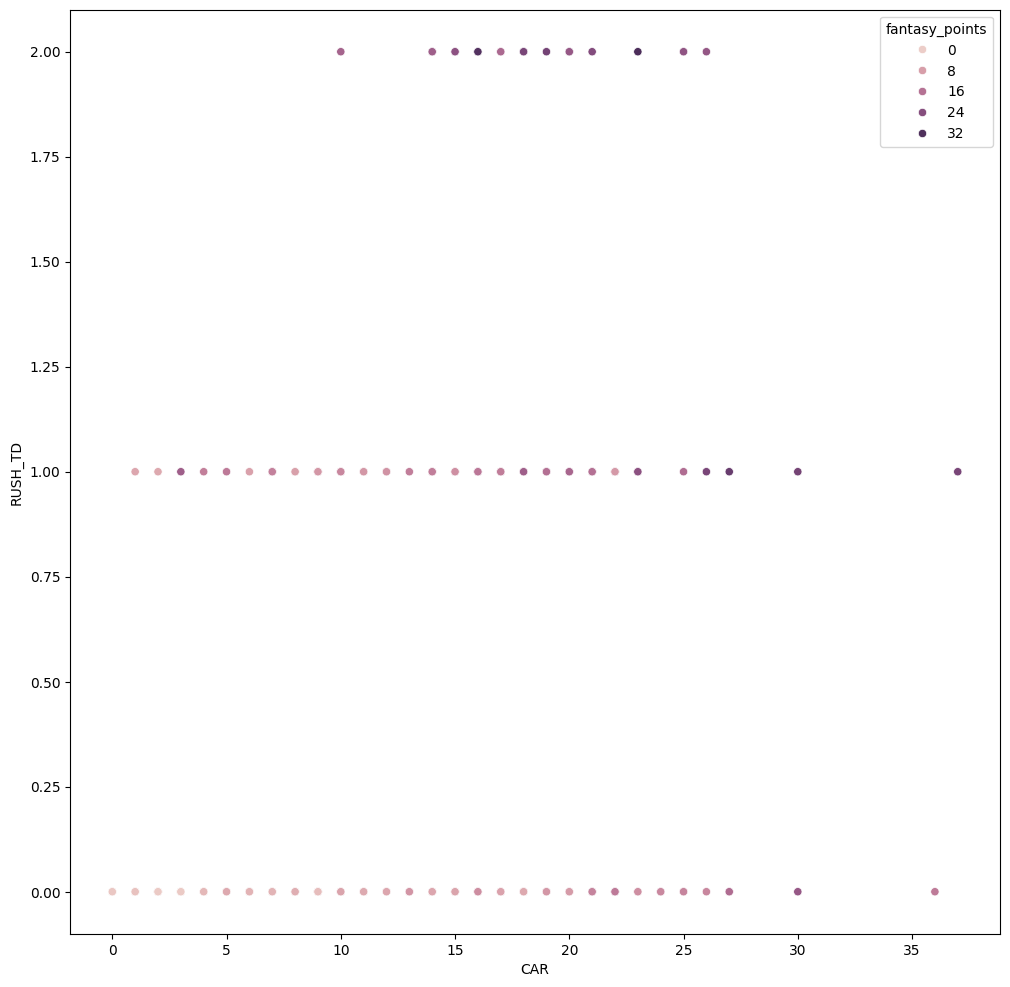

In [181]:
# 2. More carries a RB gets, the higher chance for a td?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

# Use seaborn to create with color
sns.scatterplot(data=Correlation_RunningbackWeektoWeek2023, x="CAR", y="RUSH_TD", hue="fantasy_points")

# Conclusion: More Carries may have a slight influence on the number of TDs.

In [182]:
# 3. Who are the RBs taking less snaps with high fantasy points? How do they do this?

# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
points_Groupby_QuarterbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(15)

# Find Top 10 fantasy scoring QB for the season
CAR_Groupby_QuarterbackWeektoWeek2023 = points_Groupby_QuarterbackWeektoWeek2023.sort_values(by='CAR', ascending=True)

CAR_Groupby_QuarterbackWeektoWeek2023

,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,FF,KB,Winner Score,Loser Score,fantasy_points,REC%
playerName,,,,,,,,,,,,,,,,,,,
Brian Robinson Jr.,178,733,63.1,5,227,36,43,368,110.8,4,221,4,2,0,0,477,264,178.1,10.111111
Austin Ekeler,179,628,47.9,5,195,51,74,436,105.9,1,232,5,4,0,0,374,226,159.9,9.371429
Alvin Kamara,180,694,50.1,5,165,75,86,466,81.9,1,182,0,0,0,0,362,199,189.5,11.394048
Zack Moss,182,792,56.1,5,239,27,37,192,74.8,2,124,0,0,0,0,391,270,153.9,7.857143
Bijan Robinson,200,871,66.1,4,238,53,81,455,111.6,4,264,4,3,0,0,403,261,201.1,9.564286
James Conner,208,1040,66.5,7,285,27,33,165,49.3,2,104,0,0,0,0,383,255,188.0,7.966667
Javonte Williams,217,774,54.3,3,218,47,58,228,72.5,2,140,1,1,0,0,446,272,151.7,12.777778
Kenneth Walker III,219,905,63.4,8,300,29,37,259,139.8,1,199,1,0,0,0,391,255,184.9,10.766667
Travis Etienne Jr.,221,817,54.5,9,264,51,65,411,118.9,1,219,0,0,0,0,437,236,208.3,12.233333


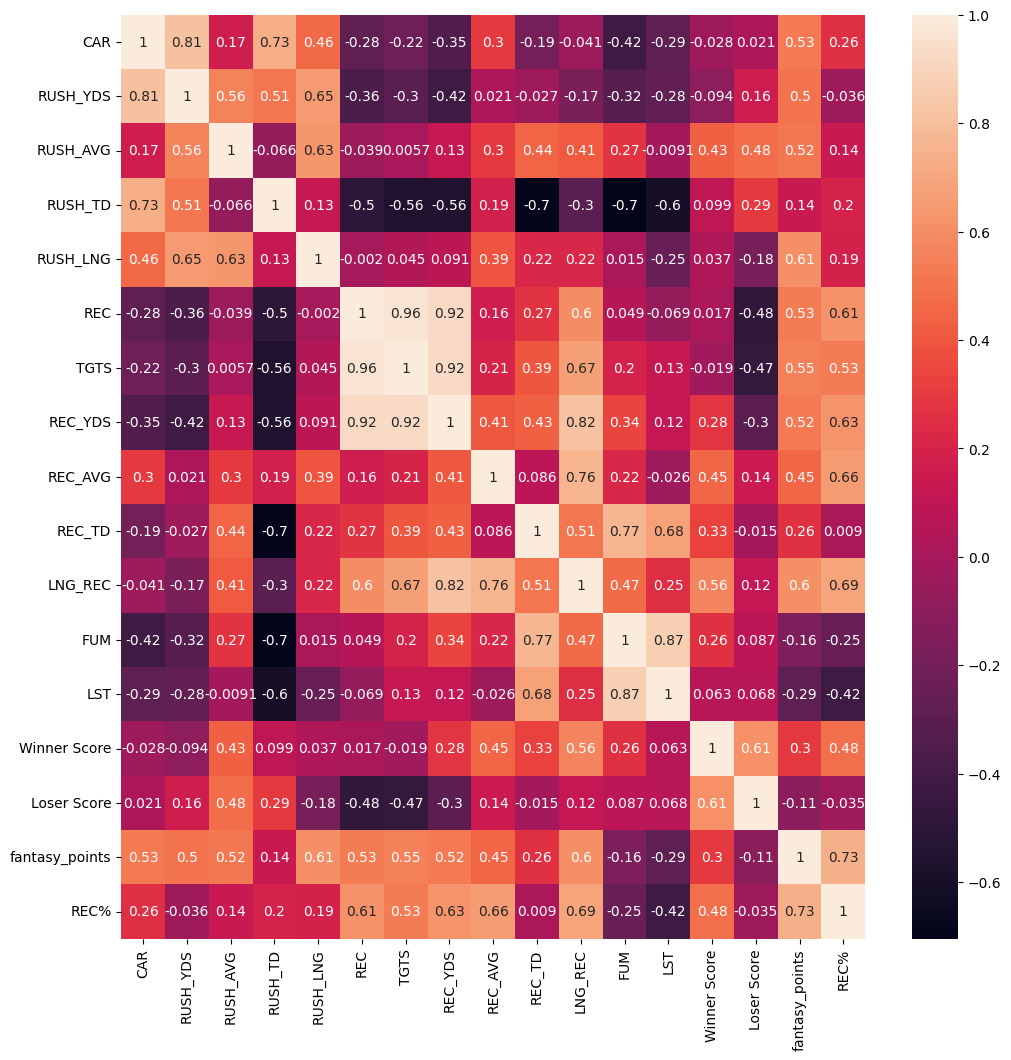

In [183]:
# 4. High correlation for Top 10 RB fantasy scorers between Rush average and fantasy points

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])
Correlation_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10)


# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_RunningbackWeektoWeek2023.groupby('playerName').mean().corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 12)

plt.show()

# Conclusion: Strong correlation between rush average and fantasy points. Even stronger correlation between Rush Yards and fantasy points.


In [184]:
# 5. Do high TD scoring RBs have more points than non high scoring TD RB?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

High_TDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_TD', ascending=False).head(25)

Low_TDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_TD', ascending=True).head(25)


High_TDgroup_RunningbackWeektoWeek2023['Scoring'] = 'High'
Low_TDgroup_RunningbackWeektoWeek2023['Scoring'] = 'Low'

Final = pd.concat([High_TDgroup_RunningbackWeektoWeek2023, Low_TDgroup_RunningbackWeektoWeek2023], axis=0).sort_values(by='fantasy_points', ascending=False)

Final

# Yes, High TD RBs generally get more points than non high scoring TD RBs.

,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,Winner Score,Loser Score,fantasy_points,REC%,Scoring
playerName,,,,,,,,,,,,,,,,,,
Breece Hall,223,994,73.0,5,410,76,95,591,134.4,4,280,2,0,420,203,250.5,12.916667,High
Joe Mixon,257,1034,68.9,9,260,52,64,376,124.8,3,255,0,0,468,282,239.0,13.757143,High
Travis Etienne Jr.,221,817,54.5,9,264,51,65,411,118.9,1,219,0,0,437,236,208.3,12.233333,High
Derrick Henry,268,1070,60.9,11,289,26,34,198,112.9,0,161,0,0,391,241,205.8,10.166667,High
Bijan Robinson,200,871,66.1,4,238,53,81,455,111.6,4,264,4,3,403,261,201.1,9.564286,High
Saquon Barkley,247,962,54.9,6,290,41,60,280,96.4,4,173,2,2,366,191,200.7,9.723810,High
Alvin Kamara,180,694,50.1,5,165,75,86,466,81.9,1,182,0,0,362,199,189.5,11.394048,High
James Conner,208,1040,66.5,7,285,27,33,165,49.3,2,104,0,0,383,255,188.0,7.966667,High
Kenneth Walker III,219,905,63.4,8,300,29,37,259,139.8,1,199,1,0,391,255,184.9,10.766667,High


In [185]:
# 6. What are the characteristics of high scoring player? Age, OL, Schedule/Opponents, etc?

In [186]:
# 7. Are the fantasy point leaders the consistent ones week in week out, are they high and low players, or average with breakout weeks? 
# Which players are performing most consistently? Which have biggest games? 

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

scoreleaders_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(5)

# Identify outliers using the lower and upper bounds

# Compare the two lists
merged_data = pd.merge(Correlation_RunningbackWeektoWeek2023, scoreleaders_RunningbackWeektoWeek2023, on='playerName', how='inner')

merged_data


,CAR_x,RUSH_YDS_x,RUSH_AVG_x,RUSH_TD_x,RUSH_LNG_x,REC_x,TGTS_x,REC_YDS_x,REC_AVG_x,REC_TD_x,LNG_REC_x,FUM_x,LST_x,playerName,Winner Score_x,Loser Score_x,fantasy_points_x,REC%_x,CAR_y,RUSH_YDS_y,RUSH_AVG_y,RUSH_TD_y,RUSH_LNG_y,REC_y,TGTS_y,REC_YDS_y,REC_AVG_y,REC_TD_y,LNG_REC_y,FUM_y,LST_y,Winner Score_y,Loser Score_y,fantasy_points_y,REC%_y
0,19,153,8.1,1,69,0,0,0,0.0,0,0,0,0,Derrick Henry,28,20,21.3,NaN,268,1070,60.9,11,289,26,34,198,112.9,0,161,0,0,391,241,205.8,10.166667
1,19,88,4.6,1,12,1,1,11,11.0,0,11,0,0,Derrick Henry,20,17,16.4,1.000,268,1070,60.9,11,289,26,34,198,112.9,0,161,0,0,391,241,205.8,10.166667
2,17,34,2.0,2,6,1,2,17,17.0,0,17,0,0,Derrick Henry,28,27,17.6,0.500,268,1070,60.9,11,289,26,34,198,112.9,0,161,0,0,391,241,205.8,10.166667
3,18,76,4.2,2,18,1,2,0,0.0,0,0,0,0,Derrick Henry,17,10,20.1,0.500,268,1070,60.9,11,289,26,34,198,112.9,0,161,0,0,391,241,205.8,10.166667
4,11,24,2.2,0,8,1,1,-4,-4.0,0,-4,0,0,Derrick Henry,20,6,2.5,1.000,268,1070,60.9,11,289,26,34,198,112.9,0,161,0,0,391,241,205.8,10.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,18,53,2.9,0,12,3,5,26,8.7,0,9,0,0,Bijan Robinson,13,8,9.4,0.600,200,871,66.1,4,238,53,81,455,111.6,4,264,4,3,403,261,201.1,9.564286
77,22,95,4.3,1,17,1,2,11,11.0,0,11,0,0,Bijan Robinson,25,23,17.1,0.500,200,871,66.1,4,238,53,81,455,111.6,4,264,4,3,403,261,201.1,9.564286
78,11,62,5.6,1,25,0,5,0,0.0,0,0,0,0,Bijan Robinson,28,23,12.2,0.000,200,871,66.1,4,238,53,81,455,111.6,4,264,4,3,403,261,201.1,9.564286
79,13,37,2.8,0,9,5,8,43,8.6,0,22,0,0,Bijan Robinson,24,16,10.5,0.625,200,871,66.1,4,238,53,81,455,111.6,4,264,4,3,403,261,201.1,9.564286


In [187]:
# 8. Who are the RB with reception TD? How do they stack up to overall TDs scored by RB?

Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

High_RECTDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_TD', ascending=False).head(10)

High_RUSHTDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_TD', ascending=False).head(10)

High_RECTDgroup_RunningbackWeektoWeek2023['TD Leader'] = 'Receiving'
High_RUSHTDgroup_RunningbackWeektoWeek2023['TD Leader'] = 'Rushing'

Final = pd.concat([High_RECTDgroup_RunningbackWeektoWeek2023, High_RUSHTDgroup_RunningbackWeektoWeek2023], axis=0).sort_values(by='RUSH_TD', ascending=False)

Final

# Conclusion: Most RBs catching TDs aren't running it in as much. However, the exceptions are Raheem Mostert, Christian Mccafrey, and Joe Mixon

,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,Winner Score,Loser Score,fantasy_points,REC%,TD Leader
playerName,,,,,,,,,,,,,,,,,,
Derrick Henry,268,1070,60.9,11,289,26,34,198,112.9,0,161,0,0,391,241,205.8,10.166667,Rushing
Joe Mixon,257,1034,68.9,9,260,52,64,376,124.8,3,255,0,0,468,282,239.0,13.757143,Rushing
Joe Mixon,257,1034,68.9,9,260,52,64,376,124.8,3,255,0,0,468,282,239.0,13.757143,Receiving
Travis Etienne Jr.,221,817,54.5,9,264,51,65,411,118.9,1,219,0,0,437,236,208.3,12.233333,Rushing
Kenneth Walker III,219,905,63.4,8,300,29,37,259,139.8,1,199,1,0,391,255,184.9,10.766667,Rushing
James Conner,208,1040,66.5,7,285,27,33,165,49.3,2,104,0,0,383,255,188.0,7.966667,Rushing
James Conner,208,1040,66.5,7,285,27,33,165,49.3,2,104,0,0,383,255,188.0,7.966667,Receiving
Saquon Barkley,247,962,54.9,6,290,41,60,280,96.4,4,173,2,2,366,191,200.7,9.723810,Receiving
Jonathan Taylor,146,672,39.5,6,183,18,22,147,58.6,1,102,1,0,266,183,132.9,6.083333,Rushing


<Axes: xlabel='RUSH_YDS', ylabel='RUSH_TD'>

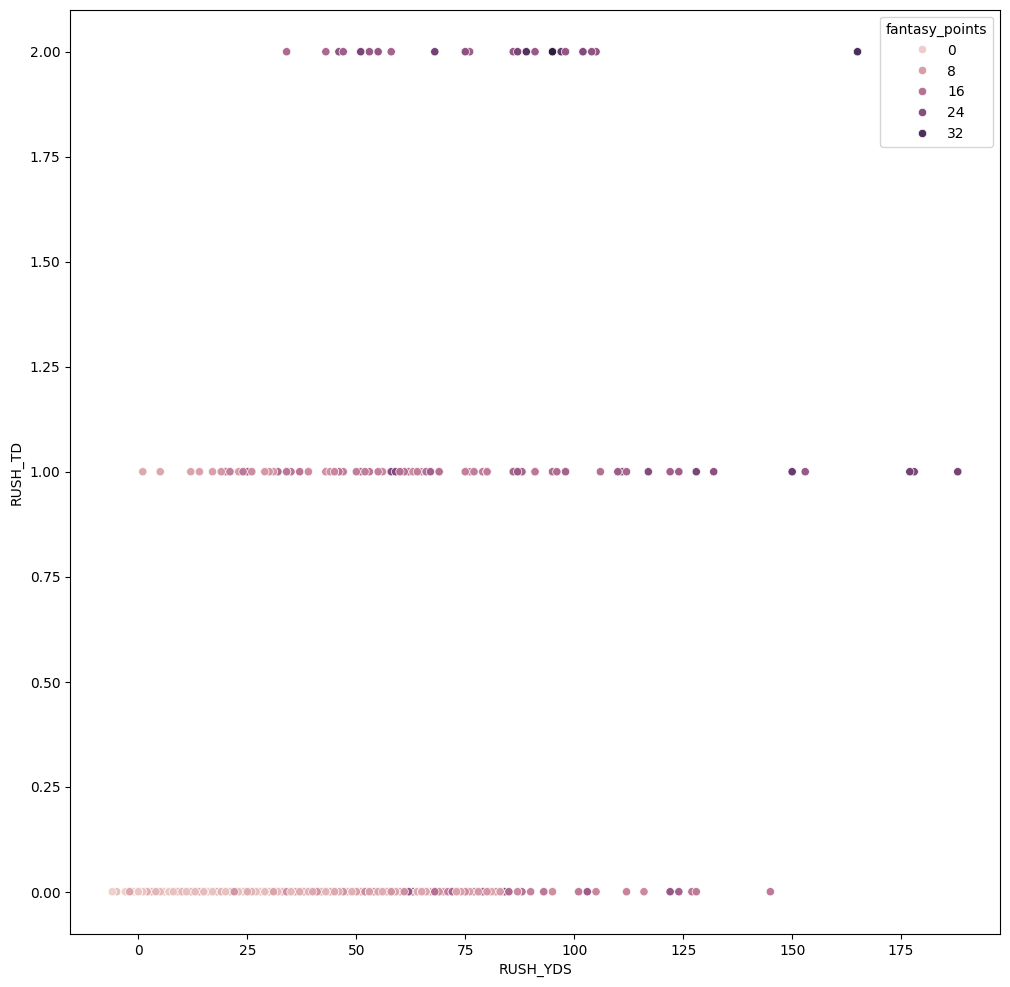

In [188]:
# 9. More rush Yards = More Tds?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

# Use seaborn to create with color
sns.scatterplot(data=Correlation_RunningbackWeektoWeek2023, x="RUSH_YDS", y="RUSH_TD", hue="fantasy_points")

# Conclusion: High Rush Yards do seem to result in more TDs.

<Axes: xlabel='REC%', ylabel='TGTS'>

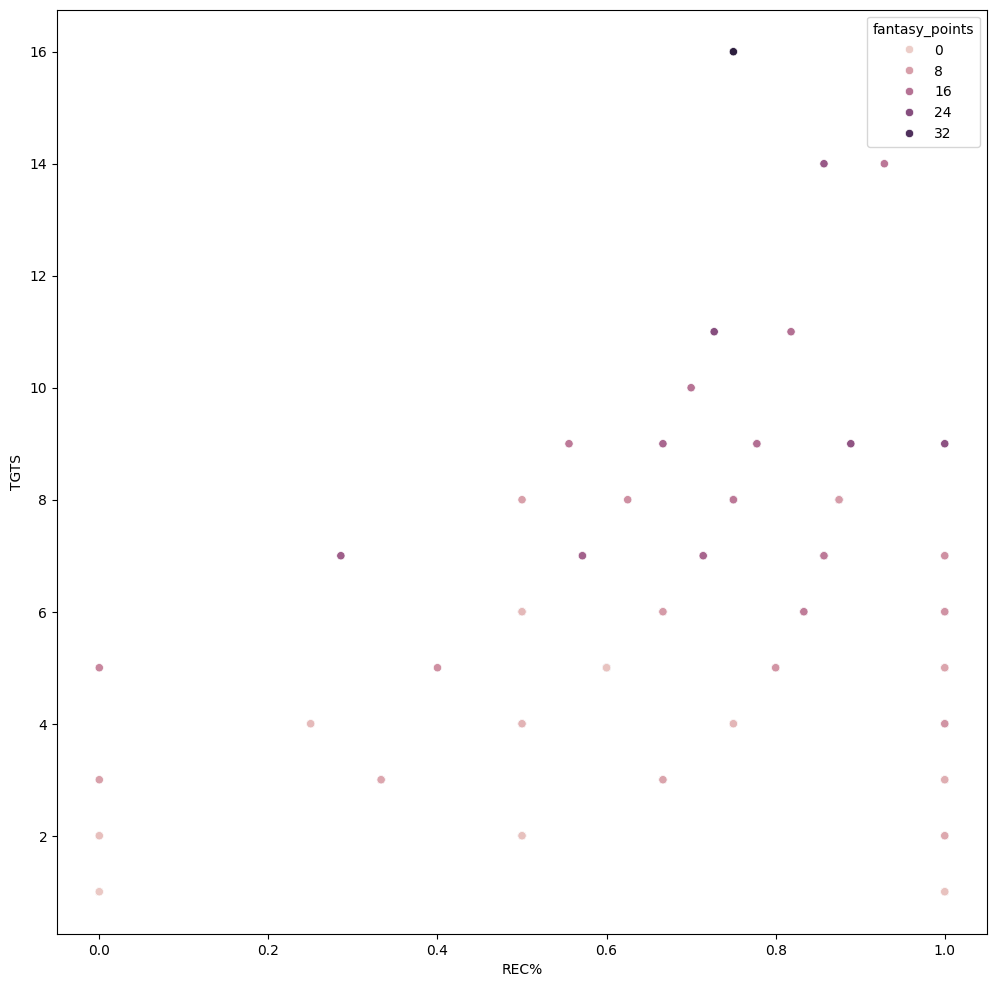

In [189]:
# 10. Higher Rec % = More Targets?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

# Use seaborn to create with color
sns.scatterplot(data=Correlation_RunningbackWeektoWeek2023, x="REC%", y="TGTS", hue="fantasy_points")

# Conclusion: High reception % do result in more targets.

In [190]:
# 11. Runningbacks don't really fumble the ball. Does this influence points scored?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='LST', ascending=False).head(10)


,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,Winner Score,Loser Score,fantasy_points,REC%
playerName,,,,,,,,,,,,,,,,,
Austin Ekeler,179,628,47.9,5,195,51,74,436,105.9,1,232,5,4,374,226,159.9,9.371429
Bijan Robinson,200,871,66.1,4,238,53,81,455,111.6,4,264,4,3,403,261,201.1,9.564286
Saquon Barkley,247,962,54.9,6,290,41,60,280,96.4,4,173,2,2,366,191,200.7,9.723810
Antonio Gibson,65,265,66.6,1,130,48,59,389,123.8,2,245,3,2,504,293,103.4,13.400000
Samaje Perine,53,238,68.7,1,111,50,56,455,154.1,0,228,3,2,477,293,96.3,15.433333
Brian Robinson Jr.,178,733,63.1,5,227,36,43,368,110.8,4,221,4,2,477,264,178.1,10.111111
Miles Sanders,129,432,48.9,1,181,27,41,154,59.0,0,91,2,2,378,211,74.1,8.422222
Alexander Mattison,180,700,60.5,0,182,30,44,192,83.4,3,138,3,2,382,273,118.2,10.869048
Javonte Williams,217,774,54.3,3,218,47,58,228,72.5,2,140,1,1,446,272,151.7,12.777778


In [191]:
# 12. Are receiving RBs more valuable than just rushing? Or are players just splitting their time between receiving and running?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

print(Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10))

print(Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='TGTS', ascending=False).head(10))


# 8 of 10 top scoring RBs are above mean receiving targets. 6 of 10 are in the 75th percentile.

                    CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                  
Breece Hall         223       994      73.0        5       410   76    95   
Joe Mixon           257      1034      68.9        9       260   52    64   
Travis Etienne Jr.  221       817      54.5        9       264   51    65   
Derrick Henry       268      1070      60.9       11       289   26    34   
Bijan Robinson      200       871      66.1        4       238   53    81   
Saquon Barkley      247       962      54.9        6       290   41    60   
Alvin Kamara        180       694      50.1        5       165   75    86   
James Conner        208      1040      66.5        7       285   27    33   
Kenneth Walker III  219       905      63.4        8       300   29    37   
Brian Robinson Jr.  178       733      63.1        5       227   36    43   

                    REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  Winner Sco

In [192]:
# 13. Who are the top RBs when it comes to rush yards, rush TDs, Rush avg, rec, fantasy points? 
# column_names = [RUSH_YDS, RUSH_TD, RUSH_AVG, REC, fantasy_points]

# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])


# Group columns to look at Quarterback WeektoWeek 2023 dataset closer.
Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10)

,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,FF,KB,Winner Score,Loser Score,fantasy_points,REC%
playerName,,,,,,,,,,,,,,,,,,,
Breece Hall,223,994,73.0,5,410,76,95,591,134.4,4,280,2,0,0,0,420,203,250.5,12.916667
Joe Mixon,257,1034,68.9,9,260,52,64,376,124.8,3,255,0,0,0,0,468,282,239.0,13.757143
Travis Etienne Jr.,221,817,54.5,9,264,51,65,411,118.9,1,219,0,0,0,0,437,236,208.3,12.233333
Derrick Henry,268,1070,60.9,11,289,26,34,198,112.9,0,161,0,0,0,0,391,241,205.8,10.166667
Bijan Robinson,200,871,66.1,4,238,53,81,455,111.6,4,264,4,3,0,0,403,261,201.1,9.564286
Saquon Barkley,247,962,54.9,6,290,41,60,280,96.4,4,173,2,2,0,0,366,191,200.7,9.723810
Alvin Kamara,180,694,50.1,5,165,75,86,466,81.9,1,182,0,0,0,0,362,199,189.5,11.394048
James Conner,208,1040,66.5,7,285,27,33,165,49.3,2,104,0,0,0,0,383,255,188.0,7.966667
Kenneth Walker III,219,905,63.4,8,300,29,37,259,139.8,1,199,1,0,0,0,391,255,184.9,10.766667


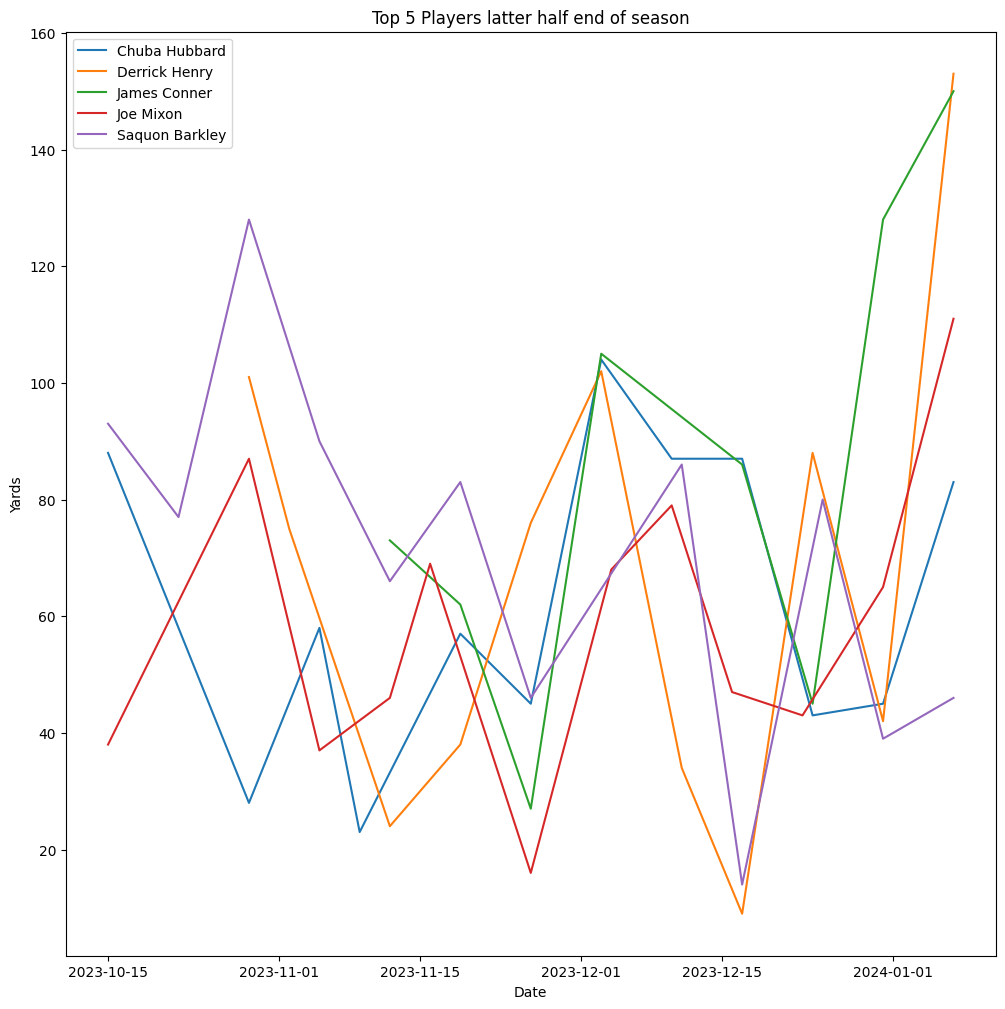

In [193]:
# 14. Who are trending up in rush yards, rush TDs, Rush avg, rec, fantasy points past 3 months?
# column_names = [CAR, RUSH_YDS, RUSH_TD, RUSH_AVG, REC, fantasy_points]

# Make sure data is organized by date so line chart will portray correctly
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.sort_values(by='Date')

# Find last date in dataset
last_date = RunningbackWeektoWeek2023['Date'].max()

# Create a variable that contains the date two months previous than the last game of 2023/24 season.
two_months_ago = last_date - timedelta(days=90)

# Only include data that is after the two month cutoff period.
filteredDate_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023[RunningbackWeektoWeek2023['Date'] >= two_months_ago]

# Remove date due to limitations from groupby
Top_10_players = filteredDate_RunningbackWeektoWeek2023.drop(columns=['Date'])

# Find Top 10 players from the last two months of season.
Top_10_players = Top_10_players.groupby('playerName', as_index=False).sum().sort_values(by='RUSH_YDS', ascending=False).head(5)

# Take players name from df
Top_10_players_names = Top_10_players['playerName']

# Keep only rows in the original DataFrame for the filtered players
filteredDate_RunningbackWeektoWeek2023 = filteredDate_RunningbackWeektoWeek2023[filteredDate_RunningbackWeektoWeek2023['playerName'].isin(Top_10_players_names)]

grouped_by_player = filteredDate_RunningbackWeektoWeek2023.groupby('playerName')

## Create a line plot for each player
for player, group in grouped_by_player:
    plt.plot(group['Date'], group['RUSH_YDS'], label=player)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Yards')
plt.title('Top 5 Players latter half end of season')
plt.legend(loc='best')  # 'best' location for the legend

# Show the plot
plt.show()

## Conclusion: Plot explains the conclusion.

In [194]:
# 15. Based on PPR value alone, who is the most valuable? 

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC', ascending=False).head(10)

,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,Winner Score,Loser Score,fantasy_points,REC%
playerName,,,,,,,,,,,,,,,,,
Breece Hall,223,994,73.0,5,410,76,95,591,134.4,4,280,2,0,420,203,250.5,12.916667
Alvin Kamara,180,694,50.1,5,165,75,86,466,81.9,1,182,0,0,362,199,189.5,11.394048
Bijan Robinson,200,871,66.1,4,238,53,81,455,111.6,4,264,4,3,403,261,201.1,9.564286
Joe Mixon,257,1034,68.9,9,260,52,64,376,124.8,3,255,0,0,468,282,239.0,13.757143
Travis Etienne Jr.,221,817,54.5,9,264,51,65,411,118.9,1,219,0,0,437,236,208.3,12.233333
Tyjae Spears,96,438,77.0,2,210,51,69,337,92.6,1,163,1,0,391,241,121.0,12.266667
Austin Ekeler,179,628,47.9,5,195,51,74,436,105.9,1,232,5,4,374,226,159.9,9.371429
Samaje Perine,53,238,68.7,1,111,50,56,455,154.1,0,228,3,2,477,293,96.3,15.433333
Ezekiel Elliott,171,588,55.5,3,154,49,63,279,79.7,2,129,2,1,371,215,139.2,10.521753


In [195]:
# 16. What about most valuable receiving RB (include TDs and YDs)?

scoring = {

# Receiving
'REC':0.5,
'REC_YDS':0.1,
'REC_TD':6

}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
RunningbackWeektoWeek2023['PPR_fantasy_points'] = RunningbackWeektoWeek2023.apply(calculate_fantasy_points, axis=1)


# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='PPR_fantasy_points', ascending=False).head(10)

,CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,RUSH_LNG,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,FUM,LST,Winner Score,Loser Score,fantasy_points,REC%,PPR_fantasy_points
playerName,,,,,,,,,,,,,,,,,,
Breece Hall,223,994,73.0,5,410,76,95,591,134.4,4,280,2,0,420,203,250.5,12.916667,121.1
Bijan Robinson,200,871,66.1,4,238,53,81,455,111.6,4,264,4,3,403,261,201.1,9.564286,96.0
Alvin Kamara,180,694,50.1,5,165,75,86,466,81.9,1,182,0,0,362,199,189.5,11.394048,90.1
Joe Mixon,257,1034,68.9,9,260,52,64,376,124.8,3,255,0,0,468,282,239.0,13.757143,81.6
Brian Robinson Jr.,178,733,63.1,5,227,36,43,368,110.8,4,221,4,2,477,264,178.1,10.111111,78.8
Austin Ekeler,179,628,47.9,5,195,51,74,436,105.9,1,232,5,4,374,226,159.9,9.371429,75.1
Antonio Gibson,65,265,66.6,1,130,48,59,389,123.8,2,245,3,2,504,293,103.4,13.400000,74.9
Travis Etienne Jr.,221,817,54.5,9,264,51,65,411,118.9,1,219,0,0,437,236,208.3,12.233333,72.6
Saquon Barkley,247,962,54.9,6,290,41,60,280,96.4,4,173,2,2,366,191,200.7,9.723810,72.5


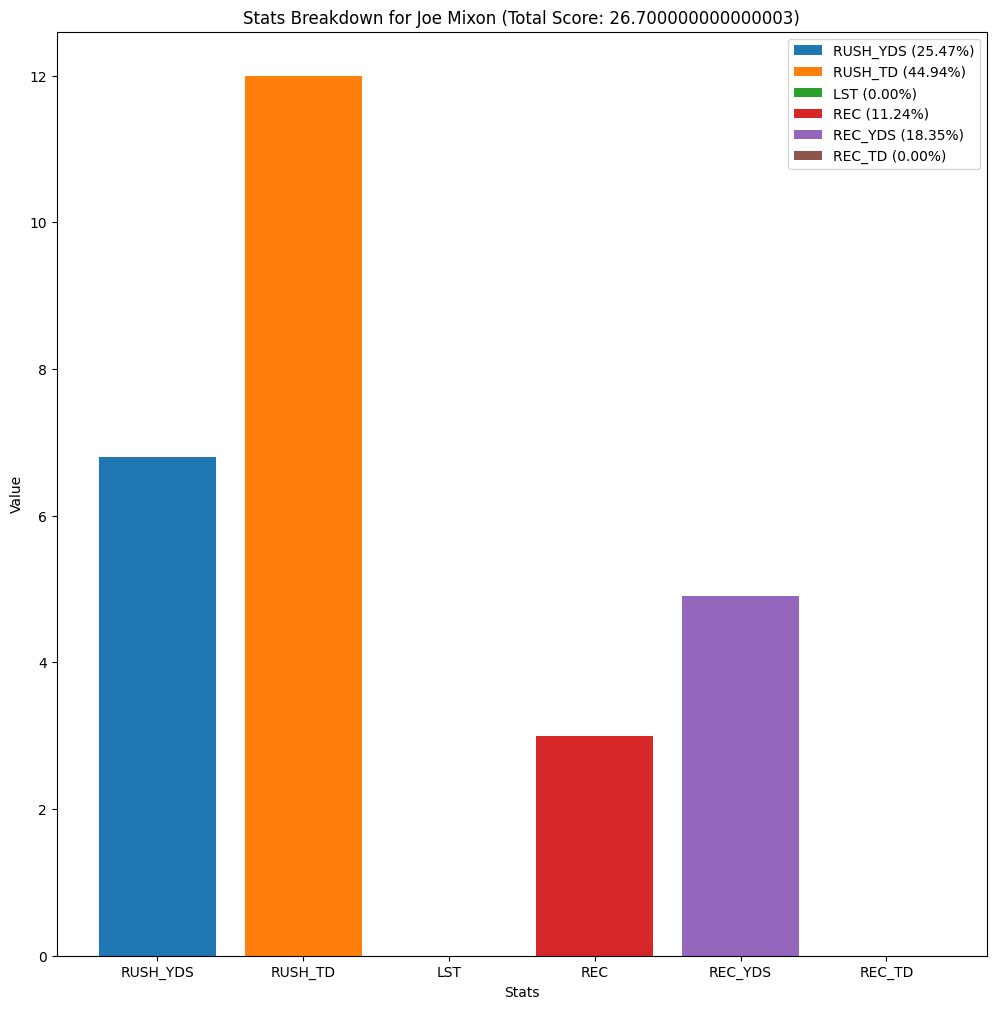

In [196]:
# 17. What stat(s) is contributing to high fantasy scores? Who are the leaders in that stat(s)?

# Sort the DataFrame by 'Total_Score' in descending order
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False)

# Select the top player for visualization (you can choose any player)
top_player = RunningbackWeektoWeek2023.iloc[7]

# Calculate the percentage contribution of each stat to the final score
RUSH_YDS_pct = (top_player['RUSH_YDS'] * 0.1 / top_player['fantasy_points']) * 100
RUSH_TD_pct = (top_player['RUSH_TD'] * 6 / top_player['fantasy_points']) * 100
LST_pct = (top_player['LST'] * -2 / top_player['fantasy_points']) * 100
REC_pct = (top_player['REC'] * 0.5 / top_player['fantasy_points']) * 100
REC_YDS_pct = (top_player['REC_YDS'] * 0.1 / top_player['fantasy_points']) * 100
REC_TD_pct = (top_player['REC_TD'] * 6 / top_player['fantasy_points']) * 100

# Create a stacked bar chart to visualize the stats and their percentages
fig, ax = plt.subplots()

# Plot the individual stats as bars
ax.bar('RUSH_YDS', top_player['RUSH_YDS'] * 0.1, label=f'RUSH_YDS ({RUSH_YDS_pct:.2f}%)')
ax.bar('RUSH_TD', top_player['RUSH_TD'] * 6, label=f'RUSH_TD ({RUSH_TD_pct:.2f}%)')
ax.bar('LST', top_player['LST']  * -2, label=f'LST ({LST_pct:.2f}%)')
ax.bar('REC', top_player['REC']  * 0.5, label=f'REC ({REC_pct:.2f}%)')
ax.bar('REC_YDS', top_player['REC_YDS'] * 0.1, label=f'REC_YDS ({REC_YDS_pct:.2f}%)')
ax.bar('REC_TD', top_player['REC_TD'] * 6, label=f'REC_TD ({REC_TD_pct:.2f}%)')

# Add labels and legend
ax.set_xlabel('Stats')
ax.set_ylabel('Value')
ax.set_title(f'Stats Breakdown for {top_player["playerName"]} (Total Score: {top_player["fantasy_points"]})')
ax.legend()

# Show the plot
plt.show()

## Receiver Exploration Questions

In [197]:
# 1. Who are the leading receivers in dataset with big rushing totals?

Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

top_receiving_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_YDS', ascending=False).head(10)

top_rushing_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_YDS', ascending=False).head(10)

top_receiving_ReceiverWeektoWeek2023['TD Leader'] = 'Receiving'
top_rushing_ReceiverWeektoWeek2023['TD Leader'] = 'Rushing'

Final = pd.concat([top_receiving_ReceiverWeektoWeek2023, top_rushing_ReceiverWeektoWeek2023], axis=0).sort_values(by='fantasy_points', ascending=False)


Final.head(10)

,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,CAR,RUSH_YDS,RUSH_AVG,LNG_RUSH,RUSH_TD,FUM,LST,Winner Score,Loser Score,fantasy_points,REC%,TD Leader
playerName,,,,,,,,,,,,,,,,,,
DJ Moore,96,136,1364,233.9,8,466,4,21,7.7,17,1,1,1,468,271,238.5,11.965049,Receiving
DJ Moore,96,136,1364,233.9,8,466,4,21,7.7,17,1,1,1,468,271,238.5,11.965049,Rushing
A.J. Brown,106,158,1456,218.8,7,451,0,0,0.0,0,0,2,2,506,355,236.6,11.632756,Receiving
Keenan Allen,108,150,1243,151.3,7,358,2,6,3.0,4,0,2,1,337,227,218.9,9.077633,Receiving
Davante Adams,103,175,1144,184.7,8,384,0,0,0.0,0,0,0,0,429,234,213.9,9.871337,Receiving
Ja'Marr Chase,100,145,1216,191.4,7,486,3,-6,-2.0,2,0,1,0,434,271,213.0,10.890298,Receiving
DK Metcalf,66,119,1114,291.5,8,520,0,0,0.0,0,0,0,0,443,293,192.4,9.065476,Receiving
Chris Olave,87,138,1123,193.9,5,379,0,0,0.0,0,0,0,0,440,259,185.8,10.173368,Receiving
Michael Pittman Jr.,101,144,1068,189.3,4,417,0,0,0.0,0,0,2,1,445,311,179.3,10.316271,Receiving


In [198]:
# 2. Are QBS fantasy scoring more than the RB and WR? Meaning better RB & WR will give you more distribution from mean?

Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

top_receiving_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_YDS', ascending=False).head(10)

top_receiving_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_YDS', ascending=False).head(10)


In [199]:
# 3. How do TEs compare to WRs?

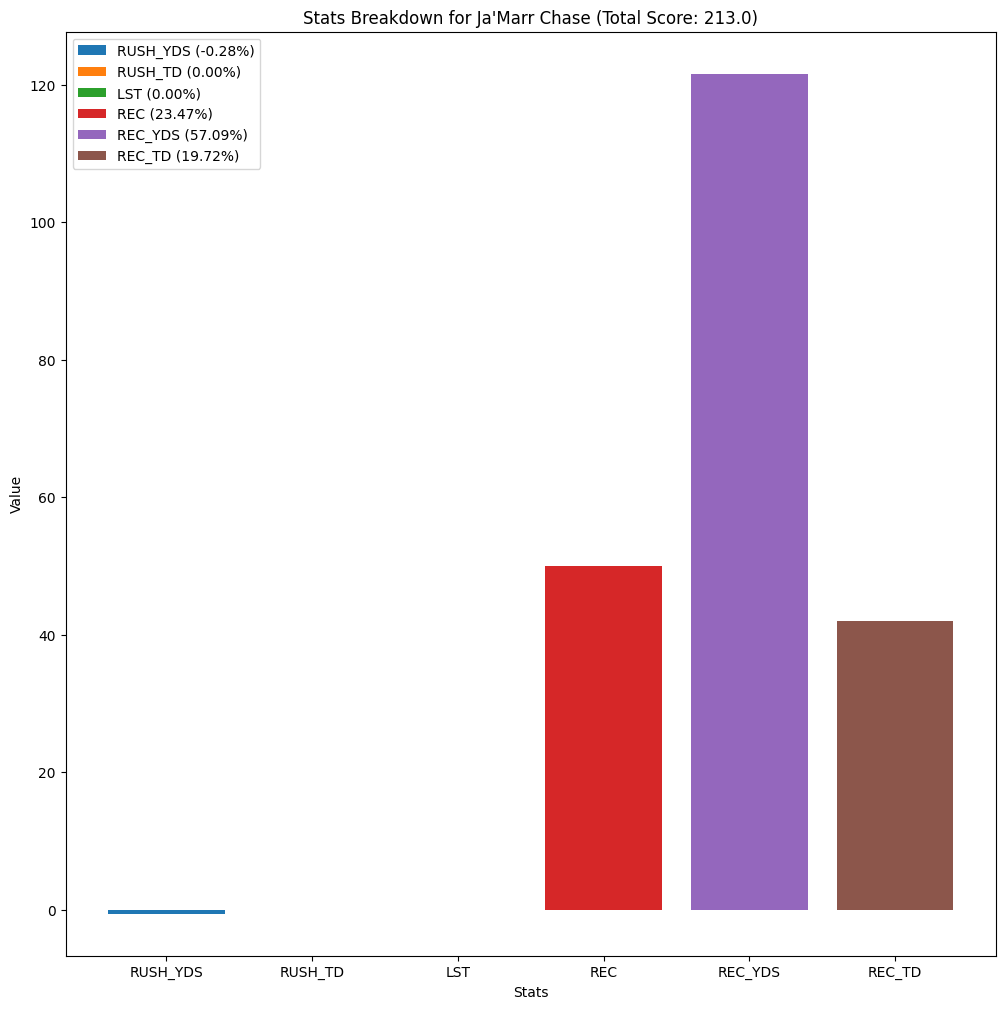

In [200]:
# 4. Where do most receiver points come from?

groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

groupby_ReceiverWeektoWeek2023 = groupby_ReceiverWeektoWeek2023.groupby('playerName', as_index=False).sum().sort_values(by='fantasy_points', ascending=False).head(5)

# Sort the DataFrame by 'Total_Score' in descending order
groupby_ReceiverWeektoWeek2023 = groupby_ReceiverWeektoWeek2023.sort_values(by='fantasy_points', ascending=False)

# Select the top player for visualization (you can choose any player)
top_player = groupby_ReceiverWeektoWeek2023.iloc[4]

# Calculate the percentage contribution of each stat to the final score
RUSH_YDS_pct = (top_player['RUSH_YDS'] * 0.1 / top_player['fantasy_points']) * 100
RUSH_TD_pct = (top_player['RUSH_TD'] * 6 / top_player['fantasy_points']) * 100
LST_pct = (top_player['LST'] * -2 / top_player['fantasy_points']) * 100
REC_pct = (top_player['REC'] * 0.5 / top_player['fantasy_points']) * 100
REC_YDS_pct = (top_player['REC_YDS'] * 0.1 / top_player['fantasy_points']) * 100
REC_TD_pct = (top_player['REC_TD'] * 6 / top_player['fantasy_points']) * 100

# Create a stacked bar chart to visualize the stats and their percentages
fig, ax = plt.subplots()

# Plot the individual stats as bars
ax.bar('RUSH_YDS', top_player['RUSH_YDS'] * 0.1, label=f'RUSH_YDS ({RUSH_YDS_pct:.2f}%)')
ax.bar('RUSH_TD', top_player['RUSH_TD'] * 6, label=f'RUSH_TD ({RUSH_TD_pct:.2f}%)')
ax.bar('LST', top_player['LST']  * -2, label=f'LST ({LST_pct:.2f}%)')
ax.bar('REC', top_player['REC']  * 0.5, label=f'REC ({REC_pct:.2f}%)')
ax.bar('REC_YDS', top_player['REC_YDS'] * 0.1, label=f'REC_YDS ({REC_YDS_pct:.2f}%)')
ax.bar('REC_TD', top_player['REC_TD'] * 6, label=f'REC_TD ({REC_TD_pct:.2f}%)')

# Add labels and legend
ax.set_xlabel('Stats')
ax.set_ylabel('Value')
ax.set_title(f'Stats Breakdown for {top_player["playerName"]} (Total Score: {top_player["fantasy_points"]})')
ax.legend()

# Show the plot
plt.show()

In [201]:
# 5. Who are the outliers when it comes to Rec_YDs, receptions, and reception tds?

Groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])
Groupby_ReceiverWeektoWeek2023 = Groupby_ReceiverWeektoWeek2023.groupby('playerName').sum()

# Assuming you have a DataFrame 'data' with a column 'value' containing your data
# Calculate the IQR (Interquartile Range)
Q1 = Groupby_ReceiverWeektoWeek2023['REC_YDS'].quantile(0.25)
Q3 = Groupby_ReceiverWeektoWeek2023['REC_YDS'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the lower and upper bounds
outliers = Groupby_ReceiverWeektoWeek2023[Groupby_ReceiverWeektoWeek2023['REC_YDS'] > upper_bound]

outliers.sort_values(by='REC_YDS', ascending=False)

,REC,TGTS,REC_YDS,REC_AVG,REC_TD,LNG_REC,CAR,RUSH_YDS,RUSH_AVG,LNG_RUSH,RUSH_TD,FUM,LST,FF,KB,Winner Score,Loser Score,fantasy_points,REC%
playerName,,,,,,,,,,,,,,,,,,,


## Additional Exploration Questions

In [202]:
# 1. What is the most valuable position in FFB? Take into account the supply and demand.

In [203]:
# 2. What is percentage of drafting a breakout player early in draft? Late in draft? Early in Waivers? Late in Waivers? 
# Does it vary by position?

## Load cleaned files into CSVs

In [204]:
# Load

QuarterbackWeektoWeek2023.to_csv(r'/Users/jacoblender/Desktop/Football dash/Data/PasserGamelog.csv')
RunningbackWeektoWeek2023.to_csv(r'/Users/jacoblender/Desktop/Football dash/Data/RunningbackGamelog.csv')
ReceiverWeektoWeek2023.to_csv(r'/Users/jacoblender/Desktop/Football dash/Data/ReceiverGamelog.csv')